# 1. Exploratory Data Analysis (EDA)

In [331]:
!pip install torch_geometric

In [332]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import ABC, abstractmethod
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm
import random
from tqdm import tqdm
import zipfile
import pandas as pd
import networkx as nx
import numpy as np
from abc import ABC, abstractmethod
from typing import Set
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise
from abc import ABC, abstractmethod
from typing import List
import sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import nltk
from nltk.corpus import stopwords
import numpy as np
from abc import ABC, abstractmethod
from typing import List, Dict

# Standard library imports
import random
import time

# Third-party imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
import torch_geometric
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import degree

from tqdm.notebook import tqdm
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
import scipy.sparse as sp



np.random.seed(42)

## 1.1 Data loading and preparation for EDA

### 1.1.1 Data loading

In [333]:
# Loop through each zip file and extract it
zip_files = ['dataset_additional.zip', 'test_data.csv.zip', 'train_data.csv.zip']
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall()
        print(f'Extracted {zip_file}')

print("All files extracted successfully.")

Extracted dataset_additional.zip
Extracted test_data.csv.zip
Extracted train_data.csv.zip
All files extracted successfully.


In [334]:
# Load the training data from CSV file into a Pandas DataFrame
train_df = pd.read_csv('train_data.csv', parse_dates=["datetime"])

In [335]:
# Load additional data about users and items from CSV file into a Pandas DataFrame
# folder_path = './dataset_additional/'
folder_path = './'
users_df = pd.read_csv(folder_path + "users_df.csv")
items_df = pd.read_csv(folder_path + "items_df.csv")

In [336]:
# Load additional data about genres, countries and staff from a CSV file into a Pandas DataFrame
genres_df = pd.read_csv(folder_path + "genres.csv")
countries_df = pd.read_csv(folder_path + "countries.csv")
staff_df = pd.read_csv(folder_path + "staff.csv")

In [337]:
# Load test data from a CSV file and group by 'user_id' to aggregate 'movie_id' into lists
test_df = pd.read_csv("test_data.csv")
test_df = test_df.groupby("user_id").agg({"movie_id": list}).reset_index()

### 1.1.2 Minimal data processing for EDA

In [338]:
# Examine the structure and contents of the items dataset
items_df

,id,title,year,date_publication,description,genres,countries,staff,title_orig,age_rating,keywords
0,0,"Мама, я дома",2022-01-01,2022-11-23T00:00:00,Где-то в глубинке вместе с дочерью и внуком жи...,[97],[238],"[1883, 33655, 25890, 1001, 12051, 10110, 16895]",NaN,NaN,NaN
1,1,Три метра над уровнем неба,2010-01-01,NaN,"История любви парня и девушки, принадлежащих к...","[138, 97, 294]",[242],"[18168, 23444, 10850, 21847, 30555, 24469, 268...",Tres metros sobre el cielo,16.00,"Три, метра, над, уровнем, неба, 2010, Испания,..."
2,2,Детектив ди и тайна призрачного пламени,2010-01-01,NaN,"690 год нашей эры, Китай. Первая императрица д...","[294, 302]","[250, 117]","[3933, 19953, 32174, 30640, 14127, 32141, 2549...",NaN,NaN,NaN
3,3,Капитан,2017-01-01,2022-10-20T00:00:00,Вторая мировая война подходит к концу. В это в...,"[97, 303, 143, 319]","[188, 212, 0]","[16006, 12217, 30668, 28806, 16172, 5045, 1663...",NaN,NaN,NaN
4,4,Лазурный берег,2015-01-01,2023-01-12T00:00:00,У бывшей танцовщицы Ванессы и писателя Роланда...,"[138, 97]","[1, 102, 0]","[23586, 8823, 8040, 34555, 32484, 18446]",By the Sea,18.00,"Франция, отель, 1970-е, горе, путешествие, нес..."
...,...,...,...,...,...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,1996-01-01,2023-03-03T00:00:00,"Переосмысление знаменитой истории Шекспира, пе...","[138, 97]","[49, 102]","[31732, 12514, 5845, 12650, 23433, 28088, 64, ...",Romeo + Juliet,12.00,"запретная любовь, основанная на пьесе или мюзи..."
7423,7423,"Поймай меня, если сможешь",2002-01-01,2020-03-27T07:13:01.449866,"Фрэнк Эбэгнейл успел поработать врачом, адвока...","[85, 303]","[121, 102]","[5166, 24667, 6277, 8266, 4854, 2186, 29049, 6...",Catch Me If You Can,12.00,"ФБР, аферист, биография, основано на реальных ..."
7424,7424,Молодой Годар,2017-01-01,NaN,"Париж, 1967 год. Жан-Люк Годар - лидер «новой ...","[138, 85]",[0],"[5828, 24468, 5125, 19939, 12752, 21851, 22674...",Le Redoubtable,18.00,"Молодой, Годар, 2017, Франция, брак, знаменито..."
7425,7425,Юлия Колерт — «Окна»,2023-01-01,2023-06-01T00:00:00,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...,[247],[238],[],NaN,NaN,NaN


In [339]:
# Convert string representations of lists in the 'genres', 'countries', and 'staff' columns to lists of integer IDs
def parse_list_string(data_entry):
    if pd.notnull(data_entry) and data_entry != '[]':
        return [int(item.strip()) for item in data_entry[1:-1].split(',')]
    return []

items_df['genres'] = items_df['genres'].apply(parse_list_string)
items_df['countries'] = items_df['countries'].apply(parse_list_string)
items_df['staff'] = items_df['staff'].apply(parse_list_string)

In [340]:
# Extract the four-digit year from the 'year' column string and converts it to an integer
items_df['year'] = items_df['year'].str.extract(r'(\d{4})')[0].astype(int)

In [341]:
# Function to replace IDs with names from a reference datasets
def replace_ids_with_names(df, col_name, ref_df):
    mapping = dict(zip(ref_df['id'], ref_df['name']))
    def replace_ids(ids):
        if ids is not None and ids != []:
            ans = []
            for id in ids:
                if id in mapping.keys():
                    ans.append(mapping[int(id)])
                else:
                    print(f"ERROR: ID {id} is not found")
            return ans
        return ids

    return df[col_name].apply(replace_ids)

items_df['countries'] = replace_ids_with_names(items_df, 'countries', countries_df)
items_df['genres'] = replace_ids_with_names(items_df, 'genres', genres_df)
items_df['staff'] = replace_ids_with_names(items_df, 'staff', staff_df)


In [342]:
# Examine the structure and contents of the items dataset after changes
items_df

,id,title,year,date_publication,description,genres,countries,staff,title_orig,age_rating,keywords
0,0,"Мама, я дома",2022,2022-11-23T00:00:00,Где-то в глубинке вместе с дочерью и внуком жи...,[Драма],[Россия],"[Мажит Жангузаров, Наталья Павленкова, Ксения ...",NaN,NaN,NaN
1,1,Три метра над уровнем неба,2010,NaN,"История любви парня и девушки, принадлежащих к...","[Мелодрама, Драма, Боевик]",[Испания],"[Альваро Сервантес, Андреа Дуро, Мария Вальвер...",Tres metros sobre el cielo,16.00,"Три, метра, над, уровнем, неба, 2010, Испания,..."
2,2,Детектив ди и тайна призрачного пламени,2010,NaN,"690 год нашей эры, Китай. Первая императрица д...","[Боевик, Фэнтези]","[Гонконг, Китай]","[Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Ча...",NaN,NaN,NaN
3,3,Капитан,2017,2022-10-20T00:00:00,Вторая мировая война подходит к концу. В это в...,"[Драма, Триллер, Военный, История]","[Германия, Польша, Франция]","[Александр Фелинг, Харальд Вармбрунн, Себастья...",NaN,NaN,NaN
4,4,Лазурный берег,2015,2023-01-12T00:00:00,У бывшей танцовщицы Ванессы и писателя Роланда...,"[Мелодрама, Драма]","[Мальта, США, Франция]","[Мелани Лоран, Мельвиль Пупо, Анджелина Джоли,...",By the Sea,18.00,"Франция, отель, 1970-е, горе, путешествие, нес..."
...,...,...,...,...,...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,1996,2023-03-03T00:00:00,"Переосмысление знаменитой истории Шекспира, пе...","[Мелодрама, Драма]","[Мексика, США]","[Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа,...",Romeo + Juliet,12.00,"запретная любовь, основанная на пьесе или мюзи..."
7423,7423,"Поймай меня, если сможешь",2002,2020-03-27T07:13:01.449866,"Фрэнк Эбэгнейл успел поработать врачом, адвока...","[Фильм, Триллер]","[Канада, США]","[Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапр...",Catch Me If You Can,12.00,"ФБР, аферист, биография, основано на реальных ..."
7424,7424,Молодой Годар,2017,NaN,"Париж, 1967 год. Жан-Люк Годар - лидер «новой ...","[Мелодрама, Фильм]",[Франция],"[Мишель Хазанавичус, Жан-Пьер Моки, Грегори Га...",Le Redoubtable,18.00,"Молодой, Годар, 2017, Франция, брак, знаменито..."
7425,7425,Юлия Колерт — «Окна»,2023,2023-06-01T00:00:00,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...,[Музыка],[Россия],[],NaN,NaN,NaN


## 1.2 Analysis of datasets with additional information (Genres, Countries and Staff)

### 1.2.1 Analysis of genres dataset

In [343]:
# Examine the structure and contents of the genres dataset
genres_df

,id,name
0,2,Сказка
1,8,Здоровье
2,17,Наука
3,24,Комедийная мелодрама
4,38,Мистика
...,...,...
91,356,Спорт
92,360,Аудиокниги
93,362,Стендап
94,366,Детские программы


In [344]:
# Provide a summary of the genres dataset, including data types and non-null counts
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      96 non-null     int64 
 1   name    96 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [345]:
# Identify duplicate entries in the genres dataset based on the 'name' column
duplicates = genres_df[genres_df.duplicated(subset='name', keep=False)]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


#### Output analysis of genres dataset

- The genres dataset consists of 96 entries, each containing an `id` and a `name` column. The data types indicate that the `id` is of integer type while the `name` is an object (string) type.

- `id` values do not correspond to the DataFrame's index.

- The dataset shows no missing values, as indicated by the `Non-Null Count`.

- Check for duplicate entries based on the `name` column revealed no duplicates.


### 1.2.2 Analysis of countries dataset

In [346]:
# Examine the structure and contents of the countries dataset
countries_df

,id,name
0,0,Франция
1,1,Мальта
2,5,Новая Зеландия
3,8,Куба
4,10,Пуэрто-Рико
...,...,...
95,249,Узбекистан
96,250,Гонконг
97,251,Непал
98,252,Индия


In [347]:
# Provide a summary of the countries dataset, including data types and non-null counts
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    int64 
 1   name    100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [348]:
# Identify duplicate entries in the countries dataset based on the 'name' column
duplicates = countries_df[countries_df.duplicated(subset='name', keep=False)]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")


No duplicates found.


#### Output analysis of countries dataset

- The countries dataset consists of 100 entries, each containing an `id` and a `name` column. The data types indicate that the `id` is of integer type while the `name` is an object (string) type.

- `id` values do not correspond to the DataFrame's index.

- The dataset shows no missing values, as indicated by the `Non-Null Count`.

- Check for duplicate entries based on the `name` column revealed no duplicates.


### 1.2.3 Analysis of staff dataset

In [349]:
# Examine the structure and contents of the staff dataset
staff_df

,id,name,role
0,0,Юрий Волынцев,actor
1,1,Коннор Смит,actor
2,2,Майкл Гандольфини,actor
3,3,Майкл Маркс,producer
4,4,Кад Мерад,actor
...,...,...,...
35679,35679,Сара Суко,actor
35680,35680,Брайан Бертино,director
35681,35681,Изабелла Феррари,actor
35682,35682,Дэвид Лесли Джонсон,writer


In [350]:
# Provide a summary of the staff dataset, including data types and non-null counts
staff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35684 entries, 0 to 35683
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35684 non-null  int64 
 1   name    35684 non-null  object
 2   role    35684 non-null  object
dtypes: int64(1), object(2)
memory usage: 836.5+ KB


In [351]:
# Calculate and display the count of each unique role and the number of unique roles in the staff dataset
role_counts = staff_df['role'].value_counts()
print(f"Number of unique roles: {len(role_counts)}")
print()
print(f"Distribution of roles:")
print(role_counts)


Number of unique roles: 8

Distribution of roles:
role
actor          21627
director        4024
writer          3727
producer        3288
editor          1572
composer        1406
presenter         39
commentator        1
Name: count, dtype: int64


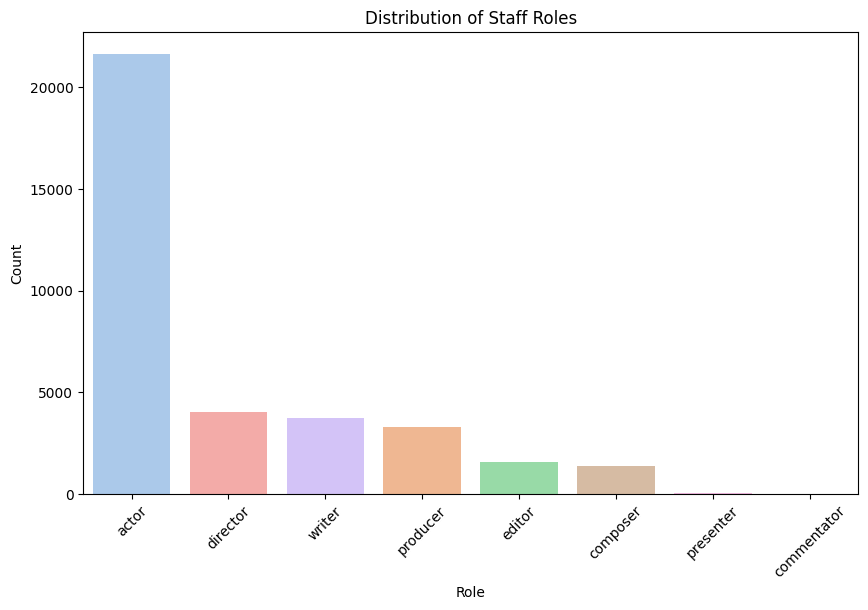

In [352]:
# Visualize the distribution of staff roles
plt.figure(figsize=(10, 6))
sns.countplot(data=staff_df, x='role', order=role_counts.index, palette='pastel', hue='role')
plt.title('Distribution of Staff Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [353]:
# Identify duplicate entries in the staff dataset based on the 'name' column
duplicates = staff_df[staff_df.duplicated(subset='name', keep=False)]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

Duplicates found:
          id              name      role
4          4         Кад Мерад     actor
13        13     Игорь Сеньков  director
16        16    Ребекка Мэтьюз  producer
25        25     Марк Тондерай    writer
35        35       Фенар Ахмад  director
...      ...               ...       ...
35621  35621       Рассел Кроу     actor
35622  35622  Сергей Светлаков    writer
35637  35637       Эрен Крюгер    writer
35652  35652   Джозеф Сарджент  producer
35680  35680    Брайан Бертино  director

[4697 rows x 3 columns]


In [354]:
# Calculate the number of unique names in the staff dataset
print(f"Unique names: {staff_df['name'].nunique()}")

Unique names: 33068


In [355]:
# Determine and display the number of individuals who has more than one role in the staff dataset
role_counts = staff_df.groupby('name')['role'].nunique()
n_roles = role_counts[role_counts > 1]
print(f"People with more than one role: {len(n_roles)}")

People with more than one role: 2081


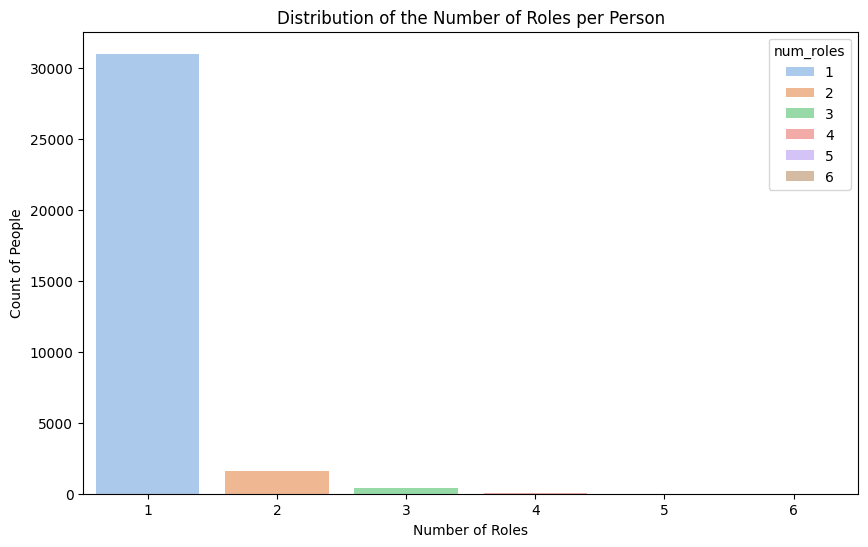

num_roles
1    30987
2     1624
3      383
4       71
5        2
6        1
Name: count, dtype: int64


In [356]:
# Visualize the distribution of the number of roles held by each individual in the staff dataset
role_counts = staff_df.groupby('name')['role'].nunique().reset_index()
role_counts.columns = ['name', 'num_roles']

plt.figure(figsize=(10, 6))
sns.countplot(data=role_counts, x='num_roles', palette='pastel', hue='num_roles')
plt.title('Distribution of the Number of Roles per Person')
plt.xlabel('Number of Roles')
plt.ylabel('Count of People')
plt.xticks(rotation=0)
plt.show()

print(role_counts['num_roles'].value_counts().sort_index())

In [357]:
# Identify individual in the staff dataset who have exactly six roles
person_with_six_roles = staff_df.groupby('name').filter(lambda x: len(x) == 6)
print(person_with_six_roles)

          id        name      role
13314  13314  Юрий Быков    editor
19245  19245  Юрий Быков  composer
19294  19294  Юрий Быков  producer
25612  25612  Юрий Быков  director
26000  26000  Юрий Быков    writer
27222  27222  Юрий Быков     actor


#### Output Analysis of Staff Dataset

- The staff dataset contains a total of 35,684 entries, organized into three columns: `id`, `name`, and `role`. The `id` column is of integer type, while the `name` and `role` columns are of object (string) type.

- The `id` column corresponds to the index in the DataFrame, indicating that individuals with the same name may have different `id` values. This will be taken into account at the data preprocessing stage.

- There are no missing values in any of the columns, as indicated by the `Non-Null Count` for each column.

- The dataset features 8 unique roles, with the majority being `actor` (21,627), followed by `director` (4,024), `writer` (3,727), and `producer` (3,288). The roles of `editor`, `composer`, `presenter`, and `commentator` have significantly fewer entries.

- A check for duplicate entries based on the `name` column identified 4,697 duplicates, indicating that several individuals may have multiple roles or appear more than once in the dataset.

- There are 33,068 unique names in the dataset, suggesting that a substantial number of individuals (2,081) holding more than one role.

-  The distribution of roles shows that most people have only one role: 30,987 individuals have one role, while 1,624 individuals have two roles, 383 have three roles, 71 have four roles, and there are very few individuals with five (2) or six (1) roles.

## 1.3 Analysis of users dataset

In [358]:
# Examine the structure and contents of the users dataset
users_df

,user_id,age_category,income,sex,kids_flg,education
0,10250,35-44,NaN,NaN,0.00,Высшее
1,2062,18-24,NaN,Женский,0.00,Среднее
2,12980,35-44,NaN,Женский,1.00,Неполное высшее
3,30646,35-44,низкий,NaN,1.00,Высшее
4,43069,25-34,NaN,Женский,NaN,Высшее
...,...,...,...,...,...,...
207372,224150,45-54,средний,Женский,1.00,Высшее
207373,227931,35-44,NaN,NaN,1.00,NaN
207374,143732,18-24,NaN,Женский,0.00,Среднее
207375,58404,25-34,низкий,Женский,1.00,Среднее


In [359]:
# Provide a summary of the users dataset, including data types and non-null counts
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207377 entries, 0 to 207376
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       207377 non-null  int64  
 1   age_category  180418 non-null  object 
 2   income        136235 non-null  object 
 3   sex           132623 non-null  object 
 4   kids_flg      186639 non-null  float64
 5   education     176270 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ MB


In [360]:
# Identify missing values in columns of the users dataset
missing_values = users_df.isnull().sum()
print(f"Missing values:")
print(missing_values)

Missing values:
user_id             0
age_category    26959
income          71142
sex             74754
kids_flg        20738
education       31107
dtype: int64


In [361]:
# Count and display the number of unique user IDs and unique values for specified columns in the users dataset
print(f"{len(users_df['user_id'].unique())} unique values for user_id")
print()

for column in ['age_category', 'income', 'sex', 'kids_flg', 'education']:
    column_unique = users_df[column].unique()
    print(f"{len(column_unique)} unique values for {column}:")
    print(column_unique)
    print()

207377 unique values for user_id

6 unique values for age_category:
['35-44' '18-24' '25-34' nan '55-70' '45-54']

5 unique values for income:
[nan 'низкий' 'средний' 'высокий' 'очень высокий']

3 unique values for sex:
[nan 'Женский' 'Мужской']

3 unique values for kids_flg:
[ 0.  1. nan]

5 unique values for education:
['Высшее' 'Среднее' 'Неполное высшее' 'Без образования' nan]



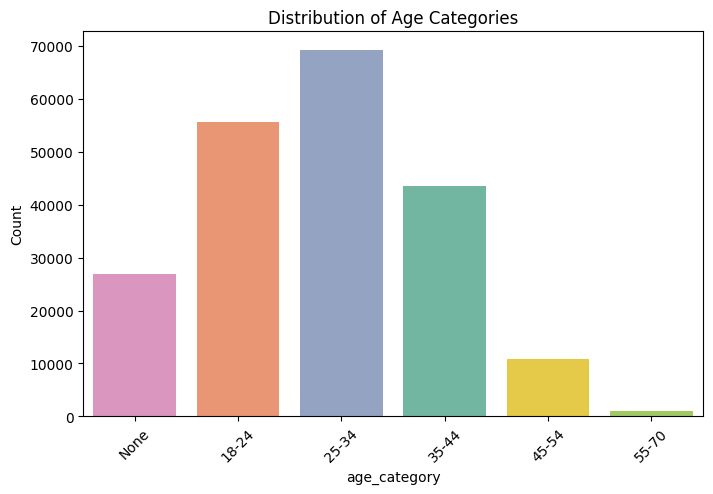

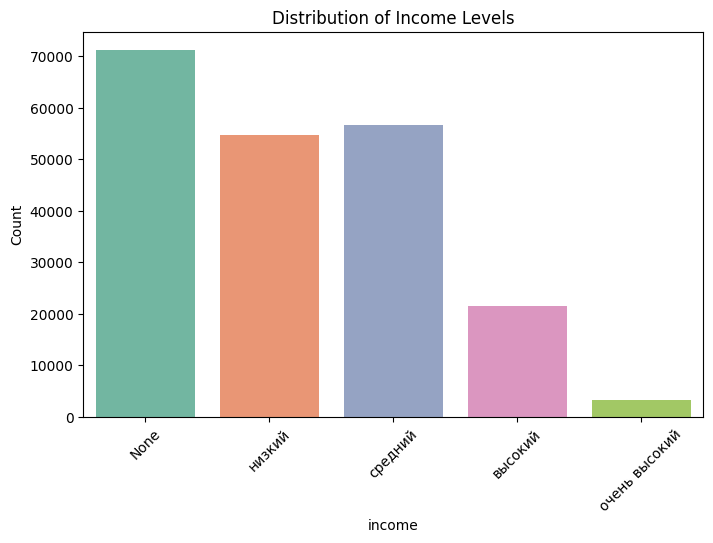

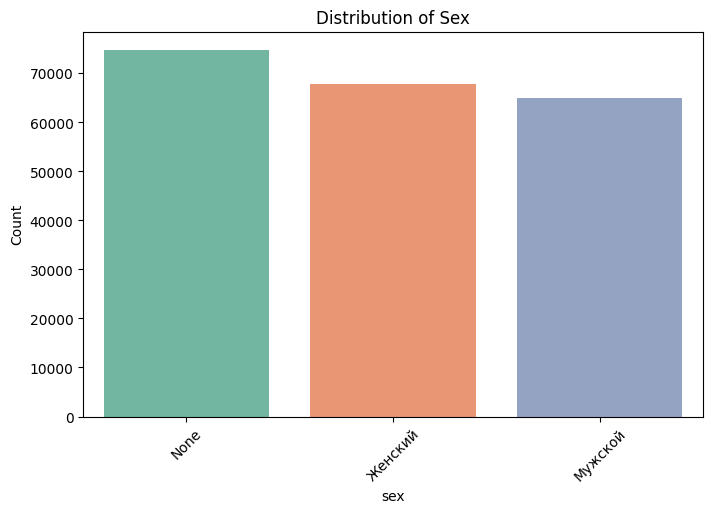

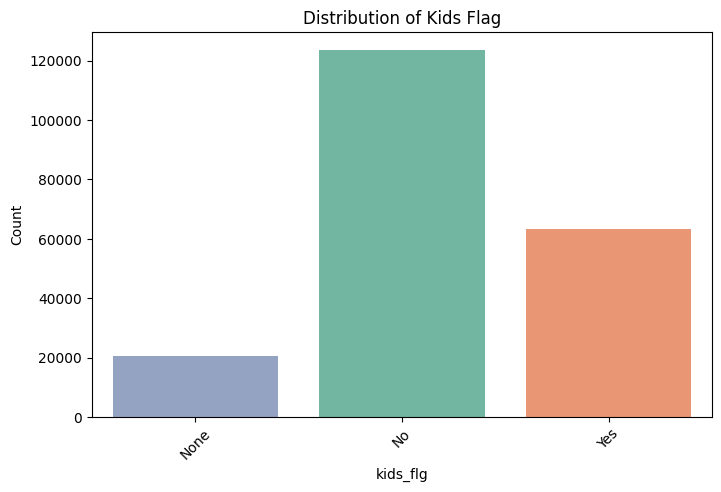

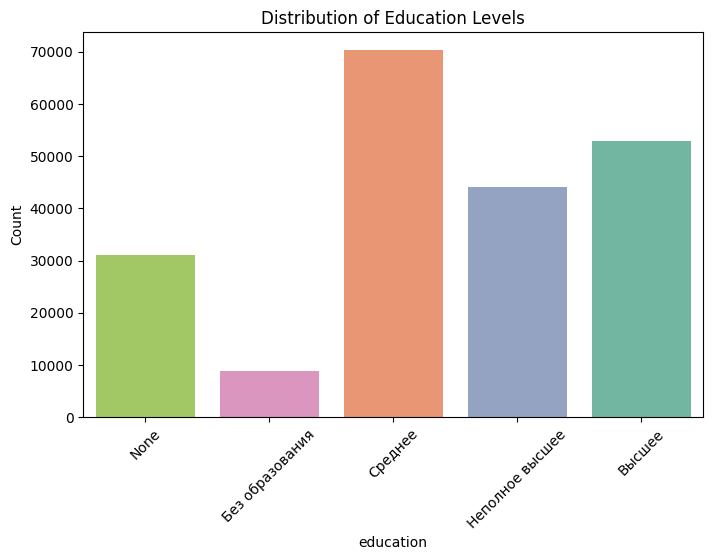

In [362]:
# Define the order for each categorical column to ensure proper visualization in the plots
age_order = ["None", '18-24', '25-34', '35-44', '45-54', '55-70']
income_order = ["None", 'низкий', 'средний', 'высокий', 'очень высокий']
sex_order = ["None", 'Женский', 'Мужской']
kids_flg_order = ["None", "No", "Yes"]
education_order = ["None", 'Без образования', 'Среднее', 'Неполное высшее', 'Высшее']

# Define a function to plot distributions for specified categorical columns
def plot_distribution(column, title, order=None):
    plt.figure(figsize=(8, 5))

    if column == 'kids_flg':
        # Cast to string to properly handle float NaNs and values for the 'kids_flg' column
        filled_column = users_df[column].fillna('None').replace({0: 'No', 1: 'Yes'}).astype(str)
        sns.countplot(data=users_df.assign(kids_flg=filled_column), x='kids_flg', order=order, palette='Set2', hue=column)
    else:
        sns.countplot(data=users_df.fillna('None'), x=column, order=order, palette='Set2', hue=column)

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for categorical columns with specified order
plot_distribution('age_category', 'Distribution of Age Categories', age_order)
plot_distribution('income', 'Distribution of Income Levels', income_order)
plot_distribution('sex', 'Distribution of Sex', sex_order)
plot_distribution('kids_flg', 'Distribution of Kids Flag', kids_flg_order)
plot_distribution('education', 'Distribution of Education Levels', education_order)

#### Output analysis of users dataset

- The users dataset consists of 207,377 entries, organized into six columns: `user_id`, `age_category`, `income`, `sex`, `kids_flg`, and `education`. The `user_id` column is of integer type, `kids_flg` column is of float type, while the others are of object (string) type.

- There are no missing values in the `user_id` column, indicating complete data for this identifier. However, several columns contain missing values. This will be taken into account at the data preprocessing stage.
  - `age_category` has 26,959 missing entries.
  - `income` has 71,142 missing entries.
  - `sex` has 74,754 missing entries.
  - `kids_flg` has 20,738 missing entries.
  - `education` has 31,107 missing entries.

- The dataset contains 207,377 unique values for `user_id`, confirming that each user is uniquely identified.

- Unique values in columns (`None` represents missing data):
  - The `age_category` column contains six unique values: `None`, `18-24`, `25-34`, `35-44`, `45-54`, `55-70`.
  - The `income` column has five unique values: `None`, `низкий`, `средний`, `высокий`, `очень высокий`.
  - The `sex` column features three unique values: `None`, `Женский`, `Мужской`.
  - The `kids_flg` column includes three unique values: `None`, `No` (0), `Yes` (1).
  - The `education` column shows five unique values: `None`, `Без образования`, `Среднее`, `Неполное высшее`, `Высшее`.


- Insights from plots:
  - Age: The largest group of users falls in the `25-34` category (around 70,000), followed by the `18-24` age group (around 55,000) and `35-44` group (around 45,000). A significant number of users did not provide their age (around 28,000). Smaller groups include those aged `45-54` (around 10,000) and `55-70` (around 2,000).

  - Income: Many users did not specify their income (around 70,000). Among those who did, the majority fall into the `низкий` and `средний` categories, with nearly equal numbers (around 55,000 each). There are fewer users in the `высокий` category (around 22,000), and very few in the `очень высокий` category (less than 5,000).

  - Sex: Among users who provided gender information, the number of `males` and `females` is roughly equal (around 70,000 each). An additional number of users did not specify their gender (around 70,000).

  - Kids Flag: The majority of users `do not have children` (more than 120,000), while approxomately twice less users (around 65,000)reported `having children`. Some users (around 20,000) did not specify whether they have children.

  - Education: Most users have `Среднее` education (around 70,000), followed by `Высшее` education (around 55,000), and `Неполное высшее` (around 45,000). A notable number of users did not provide education information (around 30,000), and very few reported having `Без образования` (around 10,000).


## 1.4 Analysis of items dataset


In [363]:
# Examine the structure and contents of the items dataset
items_df

,id,title,year,date_publication,description,genres,countries,staff,title_orig,age_rating,keywords
0,0,"Мама, я дома",2022,2022-11-23T00:00:00,Где-то в глубинке вместе с дочерью и внуком жи...,[Драма],[Россия],"[Мажит Жангузаров, Наталья Павленкова, Ксения ...",NaN,NaN,NaN
1,1,Три метра над уровнем неба,2010,NaN,"История любви парня и девушки, принадлежащих к...","[Мелодрама, Драма, Боевик]",[Испания],"[Альваро Сервантес, Андреа Дуро, Мария Вальвер...",Tres metros sobre el cielo,16.00,"Три, метра, над, уровнем, неба, 2010, Испания,..."
2,2,Детектив ди и тайна призрачного пламени,2010,NaN,"690 год нашей эры, Китай. Первая императрица д...","[Боевик, Фэнтези]","[Гонконг, Китай]","[Тони Люн Ка-Фай, Линь Цяньюй, Чао Ден, Ден Ча...",NaN,NaN,NaN
3,3,Капитан,2017,2022-10-20T00:00:00,Вторая мировая война подходит к концу. В это в...,"[Драма, Триллер, Военный, История]","[Германия, Польша, Франция]","[Александр Фелинг, Харальд Вармбрунн, Себастья...",NaN,NaN,NaN
4,4,Лазурный берег,2015,2023-01-12T00:00:00,У бывшей танцовщицы Ванессы и писателя Роланда...,"[Мелодрама, Драма]","[Мальта, США, Франция]","[Мелани Лоран, Мельвиль Пупо, Анджелина Джоли,...",By the Sea,18.00,"Франция, отель, 1970-е, горе, путешествие, нес..."
...,...,...,...,...,...,...,...,...,...,...,...
7422,7422,Ромео + Джульетта,1996,2023-03-03T00:00:00,"Переосмысление знаменитой истории Шекспира, пе...","[Мелодрама, Драма]","[Мексика, США]","[Зак Орт, Эдвина Мур, Крэйг Пирс, Лупита Очоа,...",Romeo + Juliet,12.00,"запретная любовь, основанная на пьесе или мюзи..."
7423,7423,"Поймай меня, если сможешь",2002,2020-03-27T07:13:01.449866,"Фрэнк Эбэгнейл успел поработать врачом, адвока...","[Фильм, Триллер]","[Канада, США]","[Брайан Хау, Дженнифер Гарнер, Леонардо ДиКапр...",Catch Me If You Can,12.00,"ФБР, аферист, биография, основано на реальных ..."
7424,7424,Молодой Годар,2017,NaN,"Париж, 1967 год. Жан-Люк Годар - лидер «новой ...","[Мелодрама, Фильм]",[Франция],"[Мишель Хазанавичус, Жан-Пьер Моки, Грегори Га...",Le Redoubtable,18.00,"Молодой, Годар, 2017, Франция, брак, знаменито..."
7425,7425,Юлия Колерт — «Окна»,2023,2023-06-01T00:00:00,Юлия Колерт \n«Окна»\nКоличество просмотров*: ...,[Музыка],[Россия],[],NaN,NaN,NaN


In [364]:
# Provide a summary, including data types and non-null counts
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 0 to 7426
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7427 non-null   int64  
 1   title             7427 non-null   object 
 2   year              7427 non-null   int64  
 3   date_publication  4923 non-null   object 
 4   description       7288 non-null   object 
 5   genres            7427 non-null   object 
 6   countries         7427 non-null   object 
 7   staff             7427 non-null   object 
 8   title_orig        2963 non-null   object 
 9   age_rating        3316 non-null   float64
 10  keywords          3305 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 638.4+ KB


In [365]:
# Identify missing values in columns
missing_values = items_df.isnull().sum()
print(f"Missing values:")
print(missing_values)

Missing values:
id                     0
title                  0
year                   0
date_publication    2504
description          139
genres                 0
countries              0
staff                  0
title_orig          4464
age_rating          4111
keywords            4122
dtype: int64


In [366]:
# Count and display the number of unique user IDs and unique values for specified columns
print(f"{len(items_df['id'].unique())} unique values for id")
print()

print(f"{len(items_df['title'].unique())} unique values for title")
print()

column_unique = items_df["age_rating"].unique()
print(f"{len(column_unique)} unique values for age_rating:")
print(column_unique)

7427 unique values for id

7223 unique values for title

7 unique values for age_rating:
[nan 16. 18.  6. 12.  0. 21.]


In [367]:
# Find and display entries that have duplicated titles
duplicate_titles = items_df[items_df.duplicated(subset='title', keep=False)]
grouped_duplicates = duplicate_titles.groupby('title')

print("Duplicates found:")
for title, group in grouped_duplicates:
    print(f"\nTitle: '{title}'")
    print(group)


Duplicates found:

Title: '2:22'
        id title  year date_publication  \
3840  3840  2:22  2016              NaN   
7358  7358  2:22  2018              NaN   

                                            description            genres  \
3840  В 2 часа 22 минуты авиадиспетчеру Дилану удаёт...         [Триллер]   
7358  В 2 часа 22 минуты авиадиспетчеру Дилану удаёт...  [Драма, Триллер]   

             countries                                              staff  \
3840  [Австралия, США]  [Нэйтан Паркер, Тереза Палмер, Marcus Bolton, ...   
7358  [Австралия, США]  [Пол Карри, Мейв Дермоди, Тереза Палмер, Михил...   

     title_orig  age_rating                                           keywords  
3840       2:22       16.00  222, 2017, Австралия, катастрофы, любовь, убий...  
7358       2:22       16.00  222, 2017, Австралия, катастрофы, любовь, убий...  

Title: 'PREMIER'
        id    title  year date_publication  \
1326  1326  PREMIER  2021              NaN   
4975  4975  PREMIER 

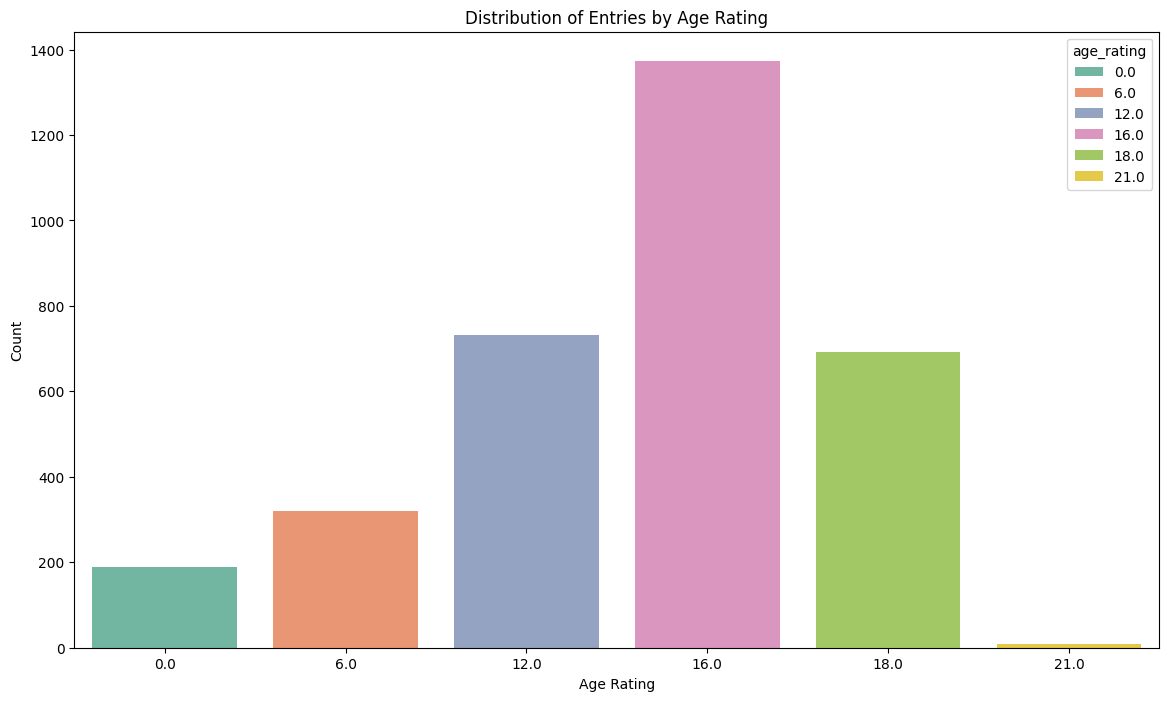

In [368]:
# Visualize the distribution of entries by age rating
plt.figure(figsize=(14, 8))
sns.countplot(data=items_df, x='age_rating', palette='Set2', hue='age_rating')
plt.title('Distribution of Entries by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.show()

In [369]:
# Display descriptive statistics for the 'year' column
items_df["year"].describe()

,year
count,7427.00
mean,2008.50
std,16.40
min,1895.00
25%,2005.00
50%,2014.00
75%,2019.00
max,2025.00


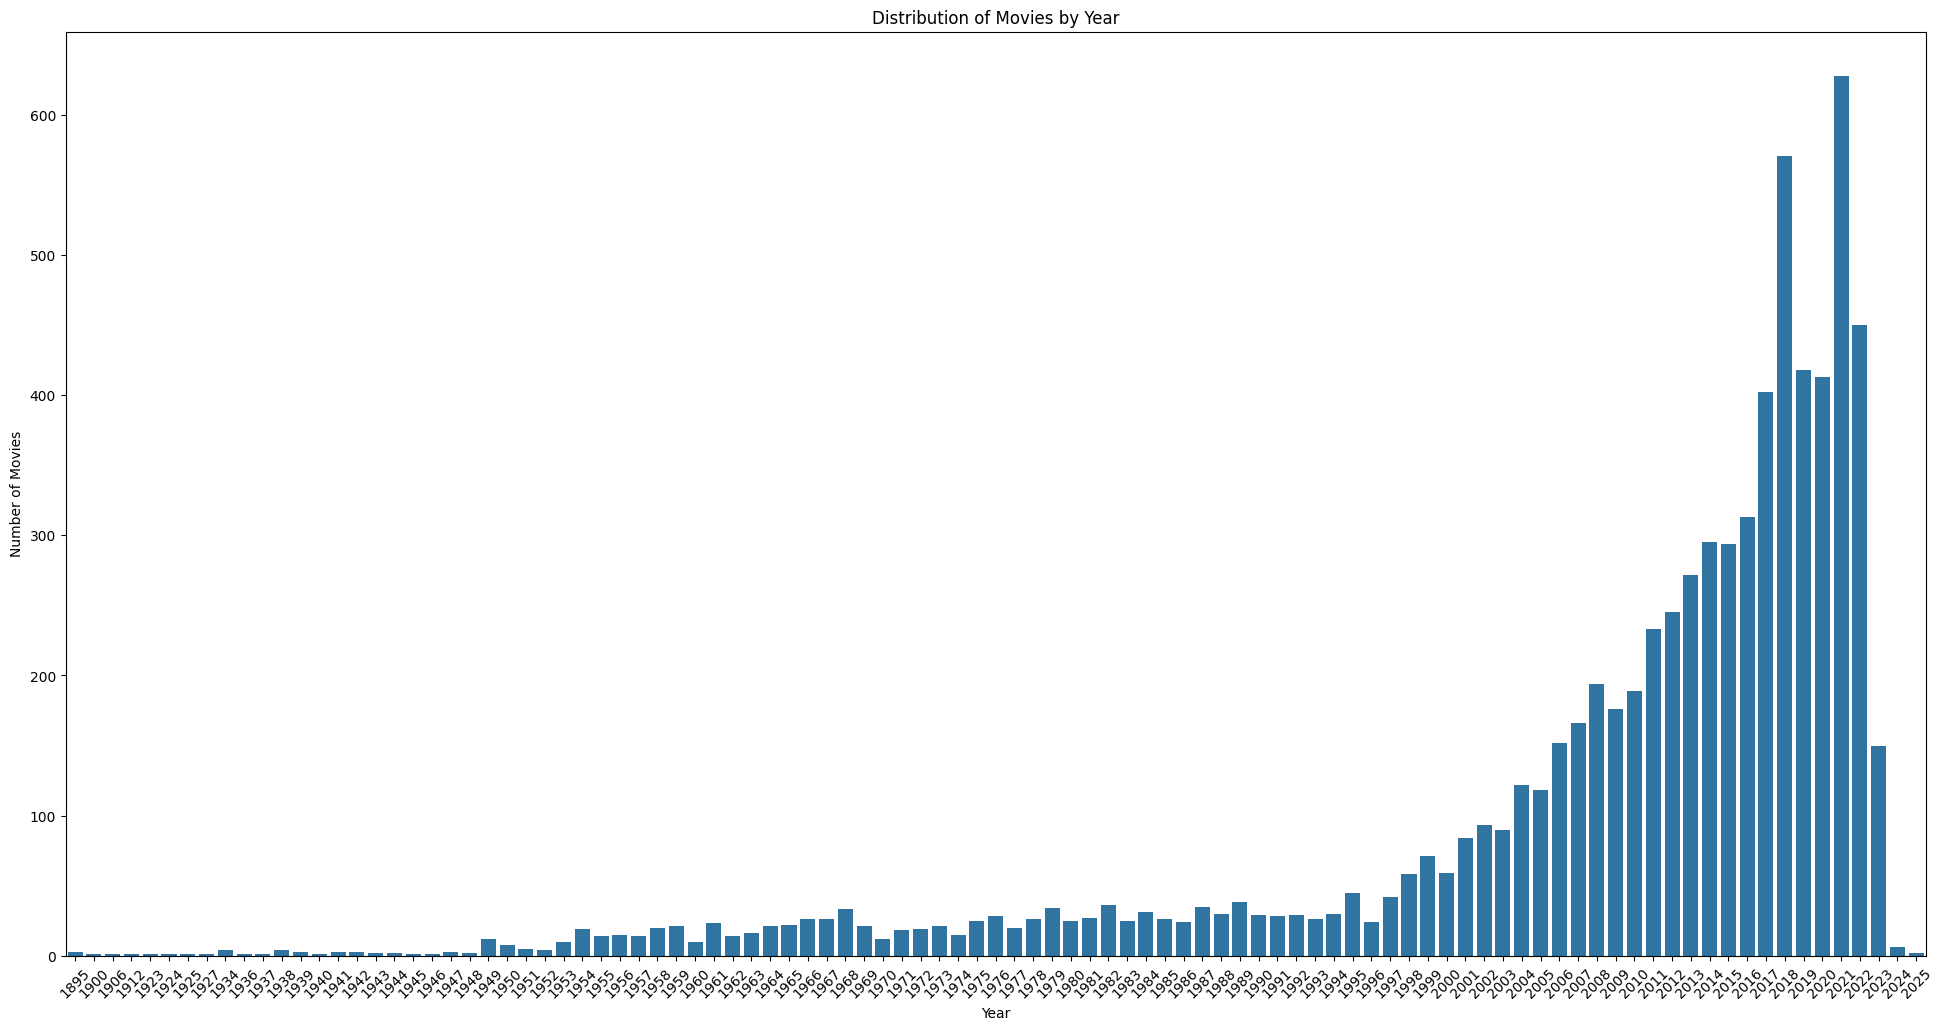

In [370]:
# Vsualize the distribution of movies released across different years
plt.figure(figsize=(24, 12))
sns.countplot(x='year', data=items_df)
plt.title('Distribution of Movies by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

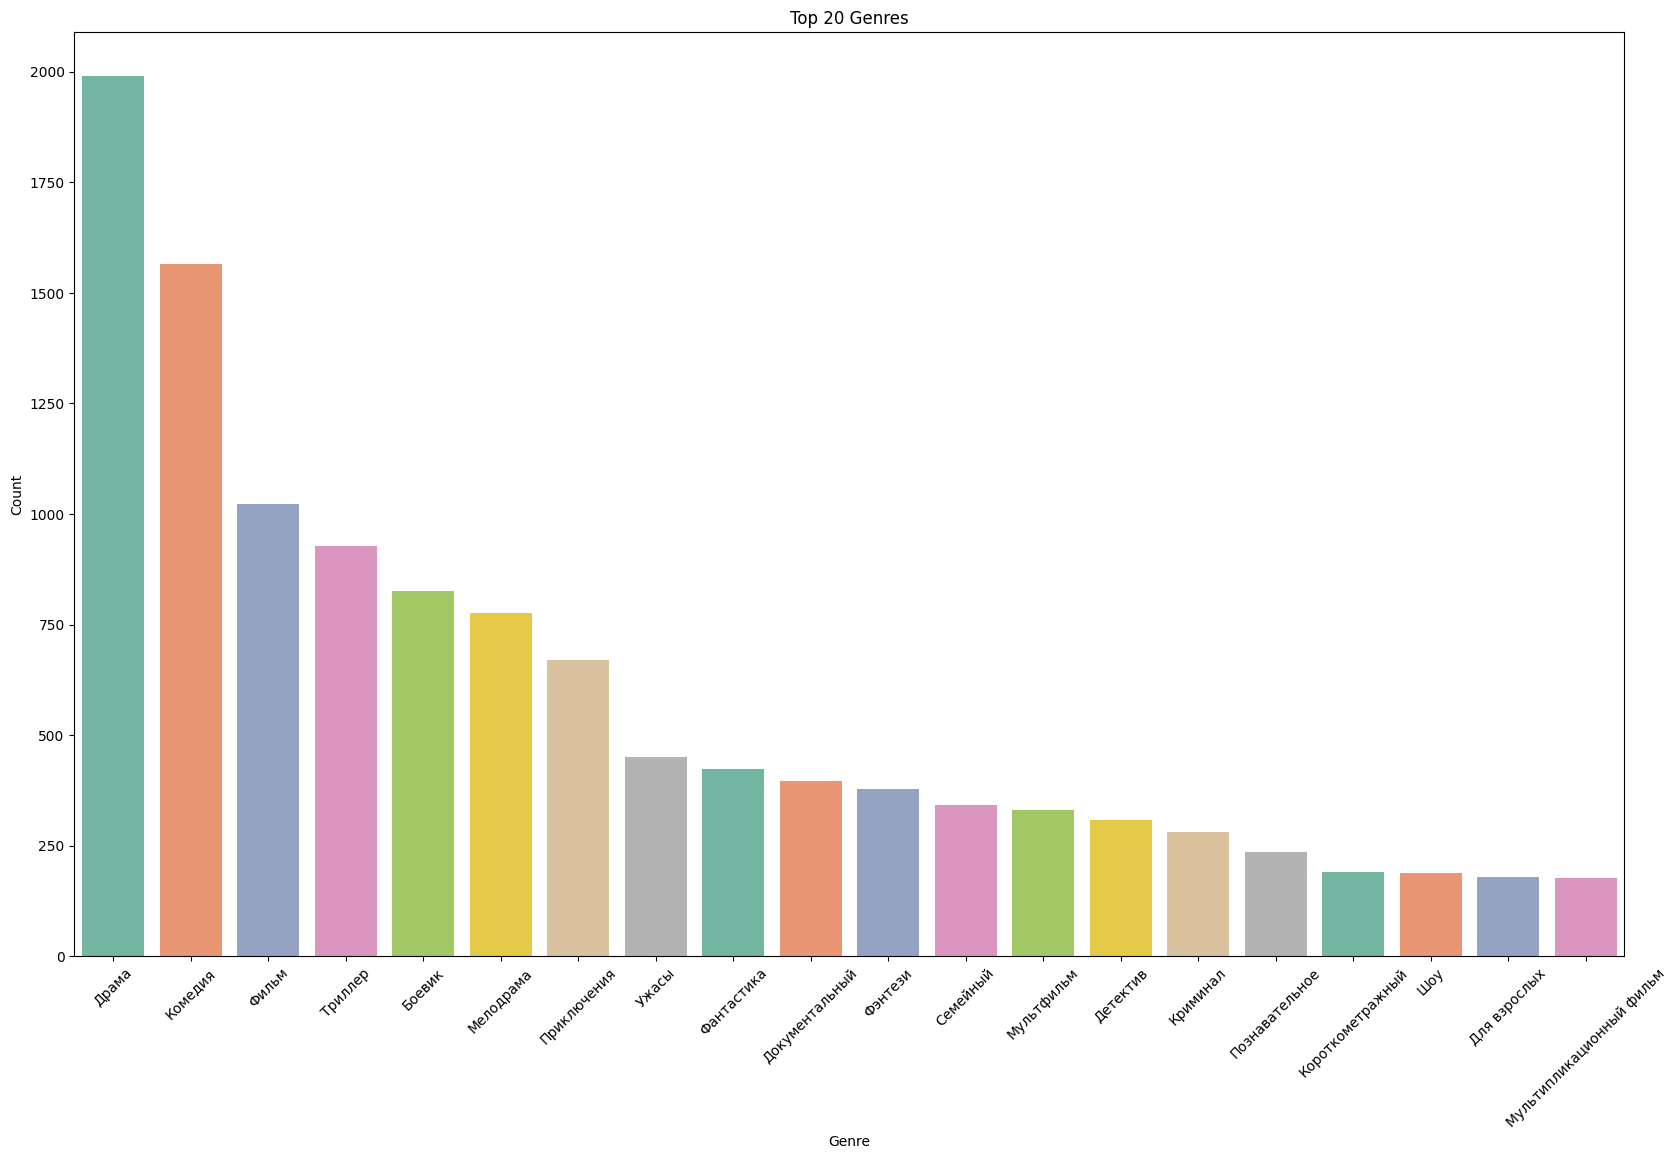

In [371]:
# Visualize the top 20 genres of items
all_genres = [genre for sublist in items_df['genres'] for genre in sublist]
top_genres = pd.Series(all_genres).value_counts().head(20)

plt.figure(figsize=(20, 12))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="Set2", hue=top_genres.index)
plt.title('Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


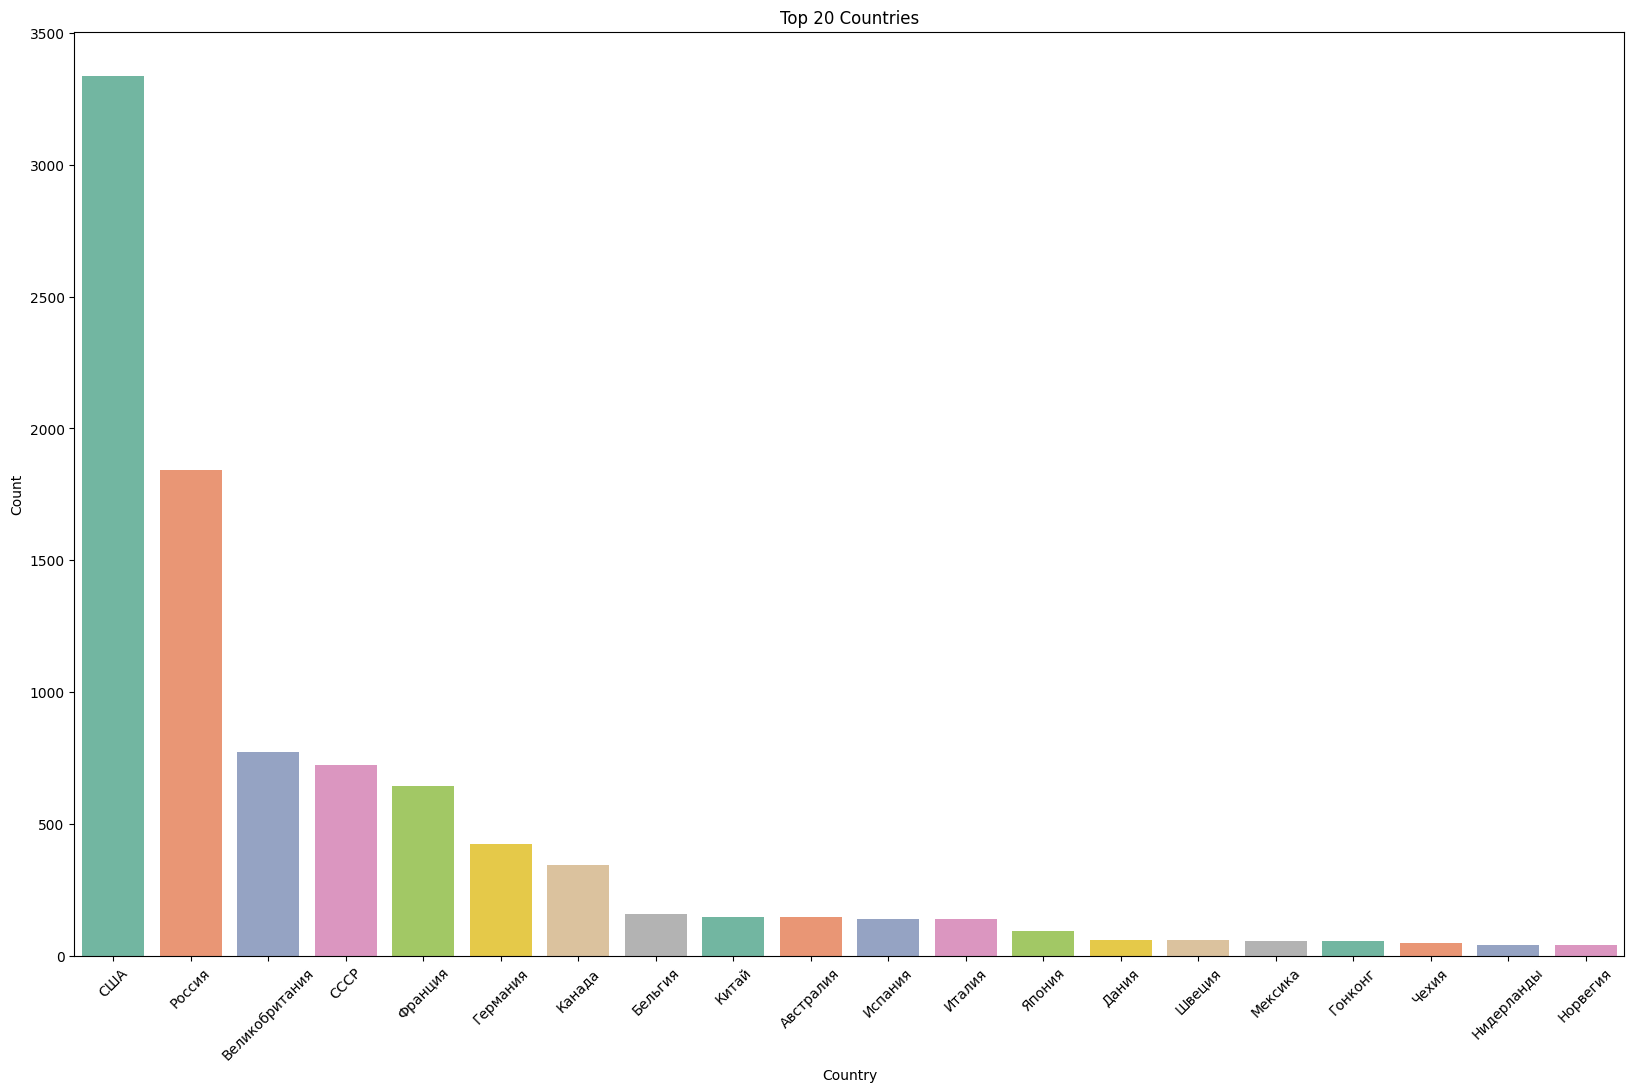

In [372]:
# Visualize the top 20 contries of items
all_countries = [country for sublist in items_df['countries'] for country in sublist]
top_countries = pd.Series(all_countries).value_counts().head(20)

plt.figure(figsize=(20, 12))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Set2", hue=top_countries.index)
plt.title('Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


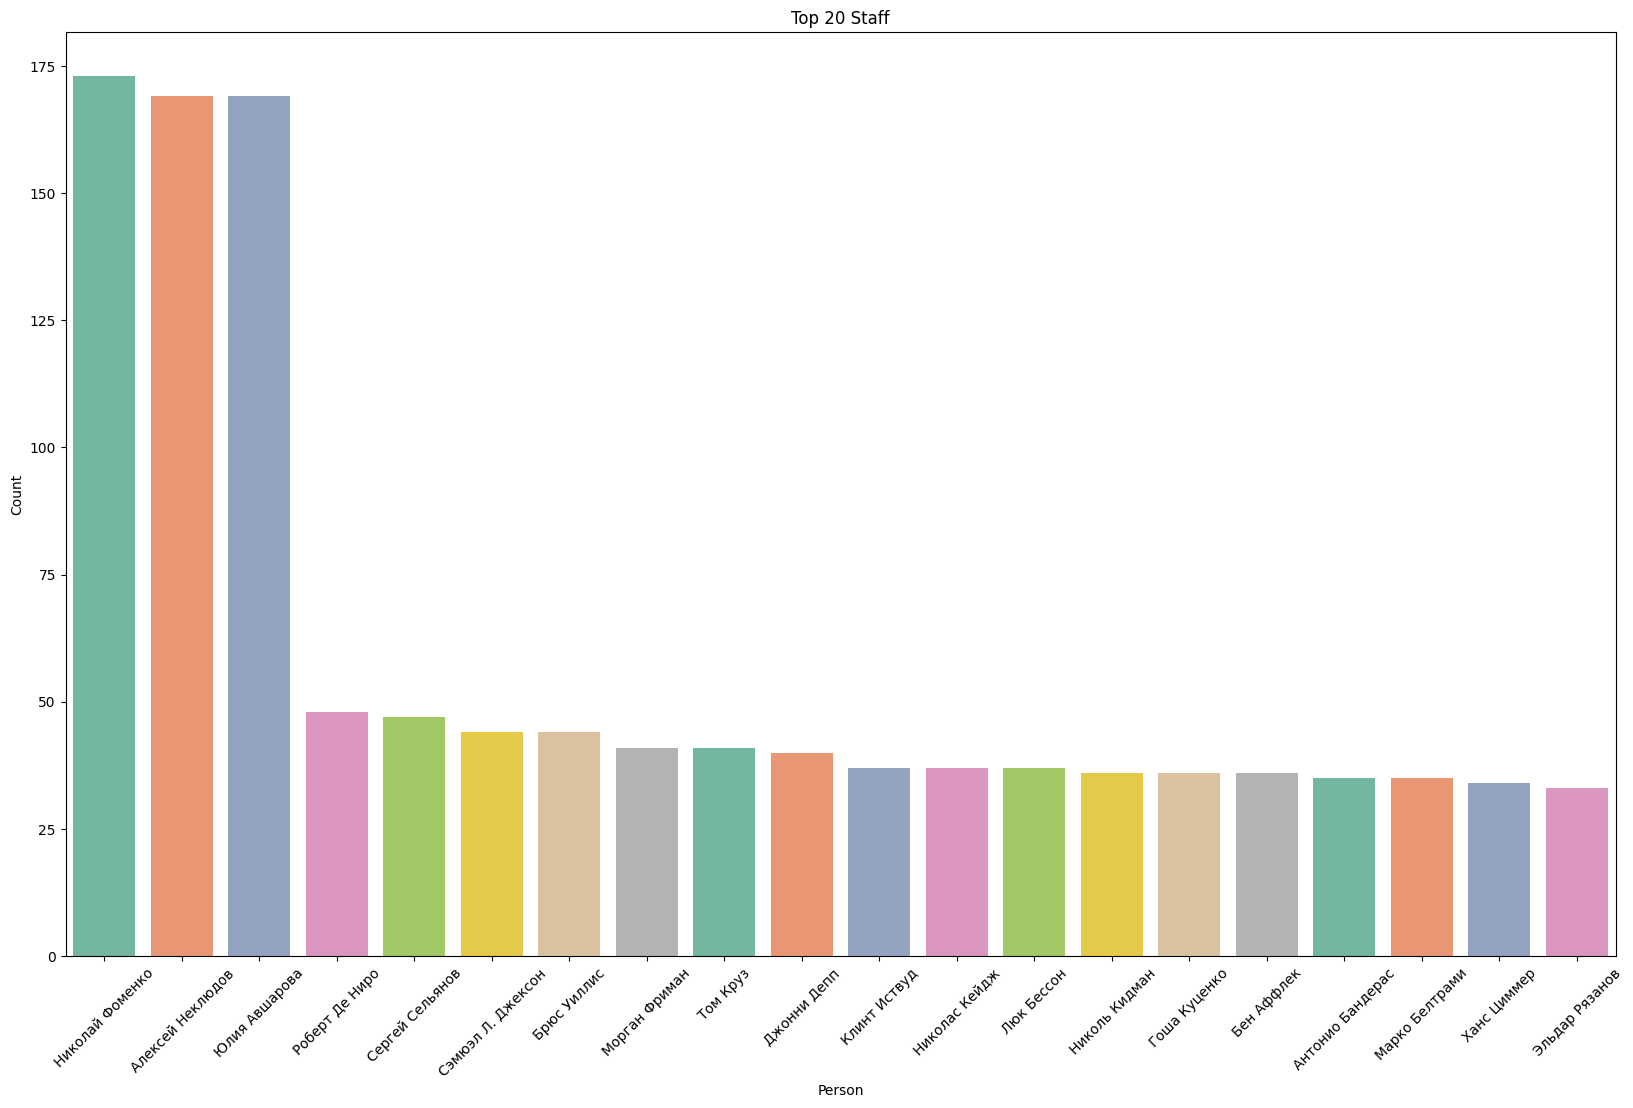

In [373]:
# Visualize the top 20 staff members
all_staff = [person for sublist in items_df['staff'] for person in sublist]
top_staff = pd.Series(all_staff).value_counts().head(20)

plt.figure(figsize=(20, 12))
sns.barplot(x=top_staff.index, y=top_staff.values, palette="Set2", hue=top_staff.index)
plt.title('Top 20 Staff')
plt.xlabel('Person')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


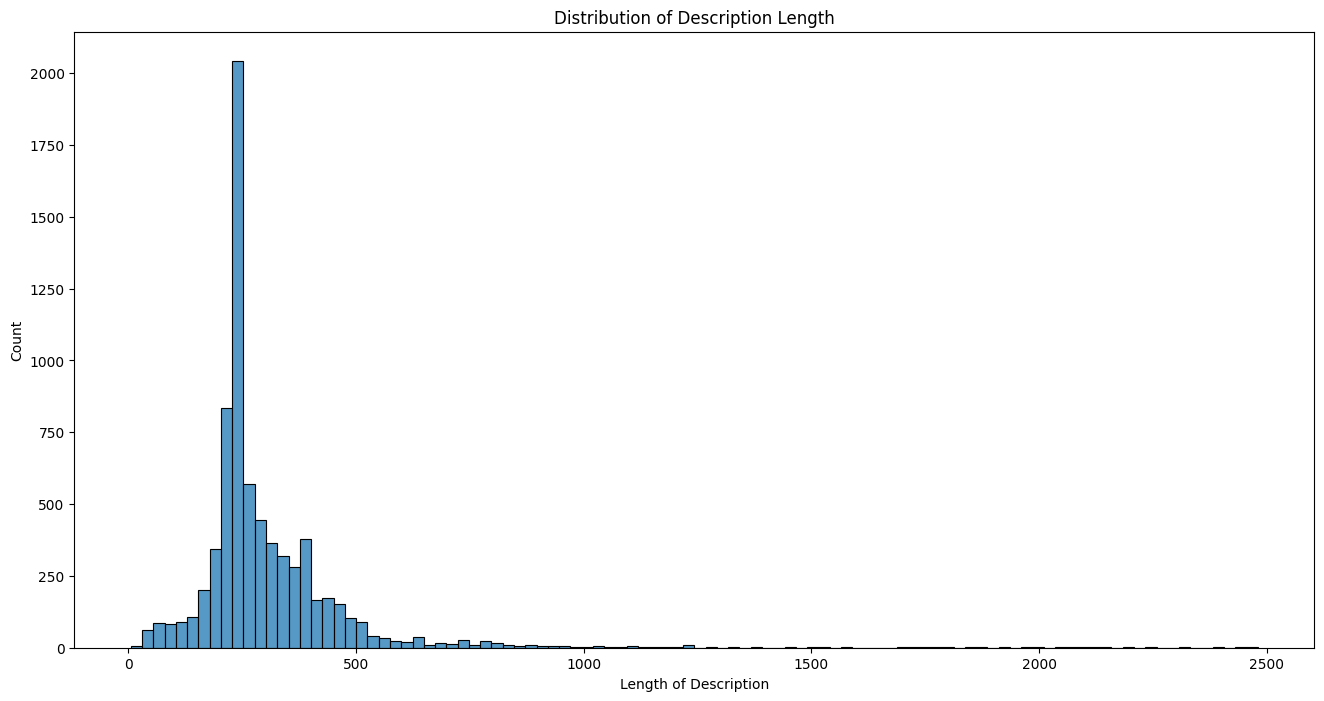

,description
count,7288.00
mean,303.36
std,181.61
min,5.00
25%,228.00
50%,250.00
75%,344.00
max,2481.00


In [374]:
# Visualize the distribution of description lengths of items
plt.figure(figsize=(16, 8))
sns.histplot(items_df['description'].str.len(), bins=100)
plt.title('Distribution of Description Length')
plt.xlabel('Length of Description')
plt.ylabel('Count')
plt.show()

items_df['description'].str.len().describe()


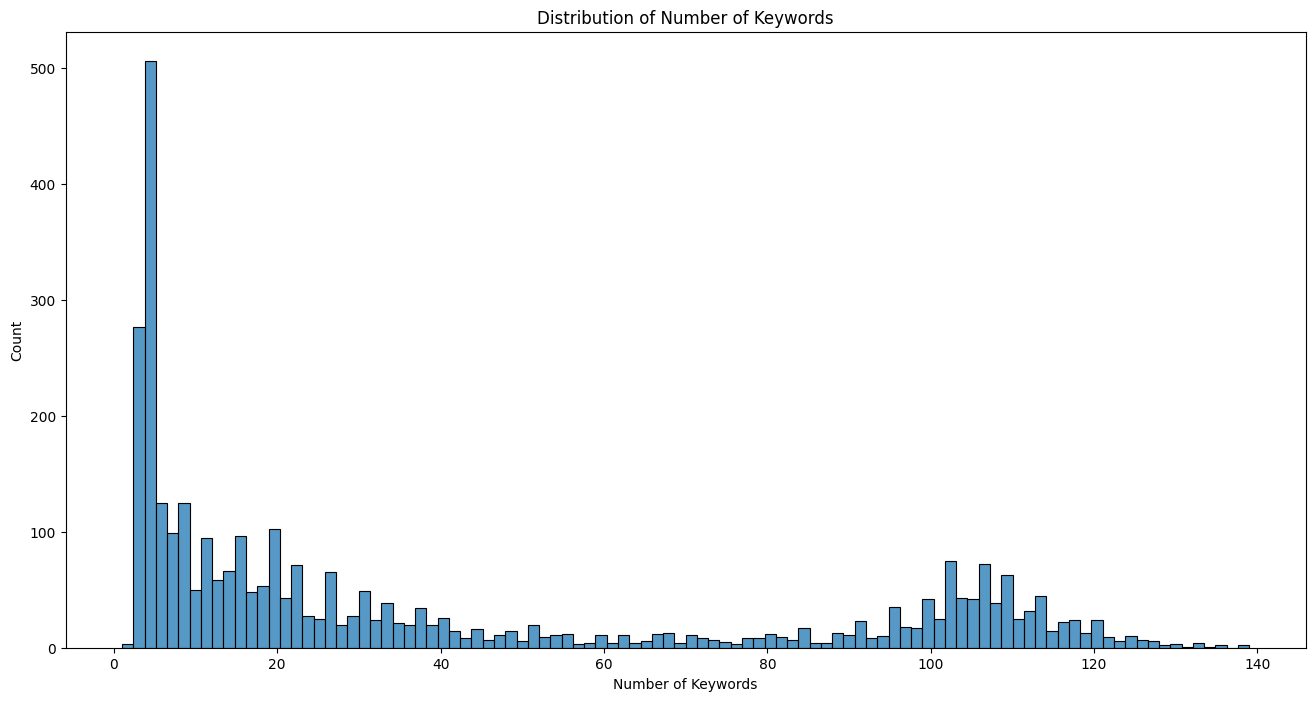

,keywords
count,3305.00
mean,40.04
std,41.38
min,1.00
25%,6.00
50%,19.00
75%,82.00
max,139.00


In [375]:
# Visualize the distribution of the number of keywords of items
keyword_counts = items_df['keywords'].dropna().str.split(',').apply(len)

plt.figure(figsize=(16, 8))
sns.histplot(keyword_counts, bins=100)
plt.title('Distribution of Number of Keywords')
plt.xlabel('Number of Keywords')
plt.ylabel('Count')
plt.show()

keyword_counts.describe()


                    missing_title_orig  missing_age_rating  missing_keywords
missing_title_orig                1.00                0.91              0.90
missing_age_rating                0.91                1.00              1.00
missing_keywords                  0.90                1.00              1.00


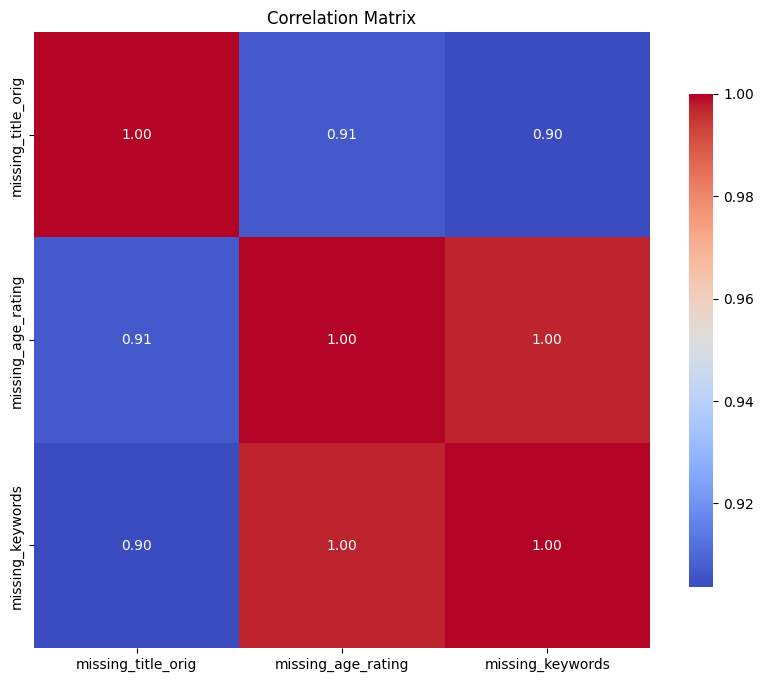

In [376]:
# Analyze correlations related to missing values
items_df_check_missing = pd.DataFrame()
items_df_check_missing['missing_title_orig'] = items_df['title_orig'].isnull().astype(int)
items_df_check_missing['missing_age_rating'] = items_df['age_rating'].isnull().astype(int)
items_df_check_missing['missing_keywords'] = items_df['keywords'].isnull().astype(int)

correlation_matrix = items_df_check_missing.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [377]:
# Analyze common characteristics of entries with missing values
items_df_check_missing = items_df.copy()
items_df_check_missing['missing_title_orig'] = items_df['title_orig'].isnull().astype(int)
items_df_check_missing['missing_age_rating'] = items_df['age_rating'].isnull().astype(int)
items_df_check_missing['missing_keywords'] = items_df['keywords'].isnull().astype(int)

missing_entries = items_df_check_missing[
    (items_df_check_missing['missing_title_orig'] == 1) |
    (items_df_check_missing['missing_age_rating'] == 1) |
    (items_df_check_missing['missing_keywords'] == 1)
]

print("Missing Age Ratings Count:")
print(missing_entries['age_rating'].isnull().sum())
print("Missing Title Orig Count:")
print(missing_entries['title_orig'].isnull().sum())
print("Missing Keywords Count:")
print(missing_entries['keywords'].isnull().sum())

genre_counts = missing_entries['genres'].explode().value_counts()
print("\nCommon Genres in Entries with Missing Values:")
print(genre_counts.head(10))

country_counts = missing_entries['countries'].explode().value_counts()
print("\nCommon Countries in Entries with Missing Values:")
print(country_counts.head(10))


Missing Age Ratings Count:
4111
Missing Title Orig Count:
4464
Missing Keywords Count:
4122

Common Genres in Entries with Missing Values:
genres
Драма             1070
Комедия            844
Фильм              493
Триллер            420
Мелодрама          412
Боевик             389
Приключения        356
Документальный     305
Ужасы              237
Познавательное     229
Name: count, dtype: int64

Common Countries in Entries with Missing Values:
countries
США               1651
Россия            1510
СССР               602
Великобритания     319
Франция            227
Германия           199
Канада             147
Италия              71
Австралия           64
Испания             57
Name: count, dtype: int64


#### Output analysis of items dataset

- The items dataset consists of **7,427 entries**, organized into **11 columns**: `id`, `title`, `year`, `date_publication`, `description`, `genres`, `countries`, `staff`, `title_orig`, `age_rating`, and `keywords`. The `id` and `year` columns are of integer type, the `age_rating` column is of float type, and the remaining columns are of object (string) type.

- There are **no missing values** in the `id`, `title`, `year`, `genres`, `countries`, and `staff` columns, indicating complete data for these characteristics. However, several columns contain missing values:
  - `date_publication` has **2,504 missing entries**.
  - `description` has **139 missing entries**.
  - `title_orig` has **4,464 missing entries**.
  - `age_rating` has **4,111 missing entries**.
  - `keywords` has **4,122 missing entries**.

- The dataset contains **7,427 unique values for `id`** suugesting that each item is uniquely identified. However, the dataset contains entries with duplicated titles (only **7,223 unique values for `title`**), the reason is remakes or different versions of the same film and there are full duplicate entries also. This will be taken into account at the data preprocessing stage.

- The `age_rating` column contains **7 unique values**: `None`, 16, 18, 6, 12, 0, 21.

- Insights from plots:
  - **Year**: The `year` column has entries ranging from **1895 to 2025**. The distribution shows a significant increase in entries from **2000 to 2024**, with minimal data before **2000**. This trend indicates a growing production of content in recent years.

  - **Age Rating**: The most common age ratings are **16 (around 1,400 entries)**, **12 and 18 (approximately 750 entries each)**, with fewer entries for ratings **6 (around 350)**, **0 (around 200)**, and **21 (fewer than 50)**.

  - **Genres**: The top genres include **Драма (around 2,000 entries)**, **Комедия (around 1,500)**, **Фильм (around 1,000)**, **Триллер (around 1,000)**, and **Боевик (around 800)**. This distribution highlights the popularity of drama and comedy in the dataset.

  - **Countries**: The most represented countries are **США (around 3,400 entries)**, **Россия (around 1,900)**, **Великобритания (around 750)**, **СССР (around 750)**, and **Франция (around 750)**. The presence of entries from historical countries like СССР indicates the inclusion of a wide range of films over different periods.

  - **Staff**: The most notable staff member is **Николай Фоменко** (around 175 appearances), followed by **Алексей Неклюдов** (around 175 appearances) and **Юлия Авшарова** (around 175 appearances). Other well-known figures, such as **Роберт Де Ниро** and **Сэмюэл Л. Джексон**, have around 50 appearances.

  - **Description Length**: The length of descriptions has a mean of approximately **303 characters**, with a maximum length of **2,481 characters** and a notable peak around **250 characters**. This indicates variability in the depth of content provided for different items.

  - **Keywords**: The distribution of the number of keywords has a peak at **5 keywords** and a lot of entries has a **90-120 keywords**. This suggests that while some items have extensive keyword tagging, many rely on a minimal set.

- **Missing Values Analysis**:
  - The analysis reveals that entities with missing values in `title_orig`, `age_rating`, and `keywords` are highly correlated.

  - The common genres associated with missing values include **Драма, Комедия, and Фильм**, while common countries include **США, Россия, and СССР**.


## 1.5 Analysis of train dataset

In [378]:
# Examine the structure and contents of the train dataset
train_df

,id,datetime,user_id,movie_id,duration,is_train
0,0,2023-04-06 15:00:00.071114+03:00,10250,427.00,485.00,True
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521.00,129.00,True
2,2,2023-04-06 15:00:03.957246+03:00,12980,4598.00,2795.00,True
3,3,2023-04-06 15:00:04.990565+03:00,30646,5324.00,5094.00,True
4,4,2023-04-06 15:00:10.495017+03:00,43069,4291.00,75.00,True
...,...,...,...,...,...,...
1251866,2477876,2023-06-14 23:59:02.925097+03:00,31874,7367.00,770.00,True
1251867,2477879,2023-06-14 23:59:06.073919+03:00,74122,1847.00,2908.00,True
1251868,2477890,2023-06-14 23:59:33.756448+03:00,112950,2784.00,345.00,True
1251869,2477898,2023-06-14 23:59:50.429716+03:00,34303,1520.00,2021.00,True


In [379]:
# Provide a summary, including data types and non-null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251871 entries, 0 to 1251870
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   id        1251871 non-null  int64  
 1   datetime  1251871 non-null  object 
 2   user_id   1251871 non-null  int64  
 3   movie_id  1251871 non-null  float64
 4   duration  1251871 non-null  float64
 5   is_train  1251871 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(1)
memory usage: 48.9+ MB


In [380]:
# Check if all values in the 'is_train' column are True
all_true = train_df['is_train'].all()

if all_true:
    print("All values in 'is_train' are True.")
else:
    print("Not all values in 'is_train' are True.")

All values in 'is_train' are True.


In [381]:
# Count and display the number of unique values for specified columns
print(f"{len(train_df['id'].unique())} unique values for id")
print()

print(f"{len(train_df['user_id'].unique())} unique values for user id")
print()

print(f"{len(train_df['movie_id'].unique())} unique values for movie id")
print()


1251871 unique values for id

207377 unique values for user id

5269 unique values for movie id



In [382]:
# Get the first and last date
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='ISO8601')

first_date = train_df['datetime'].min()
last_date = train_df['datetime'].max()
print(f"First Date: {first_date}")
print(f"Last Date: {last_date}")

First Date: 2023-04-06 15:00:00.071114+03:00
Last Date: 2023-06-14 23:59:57.679860+03:00


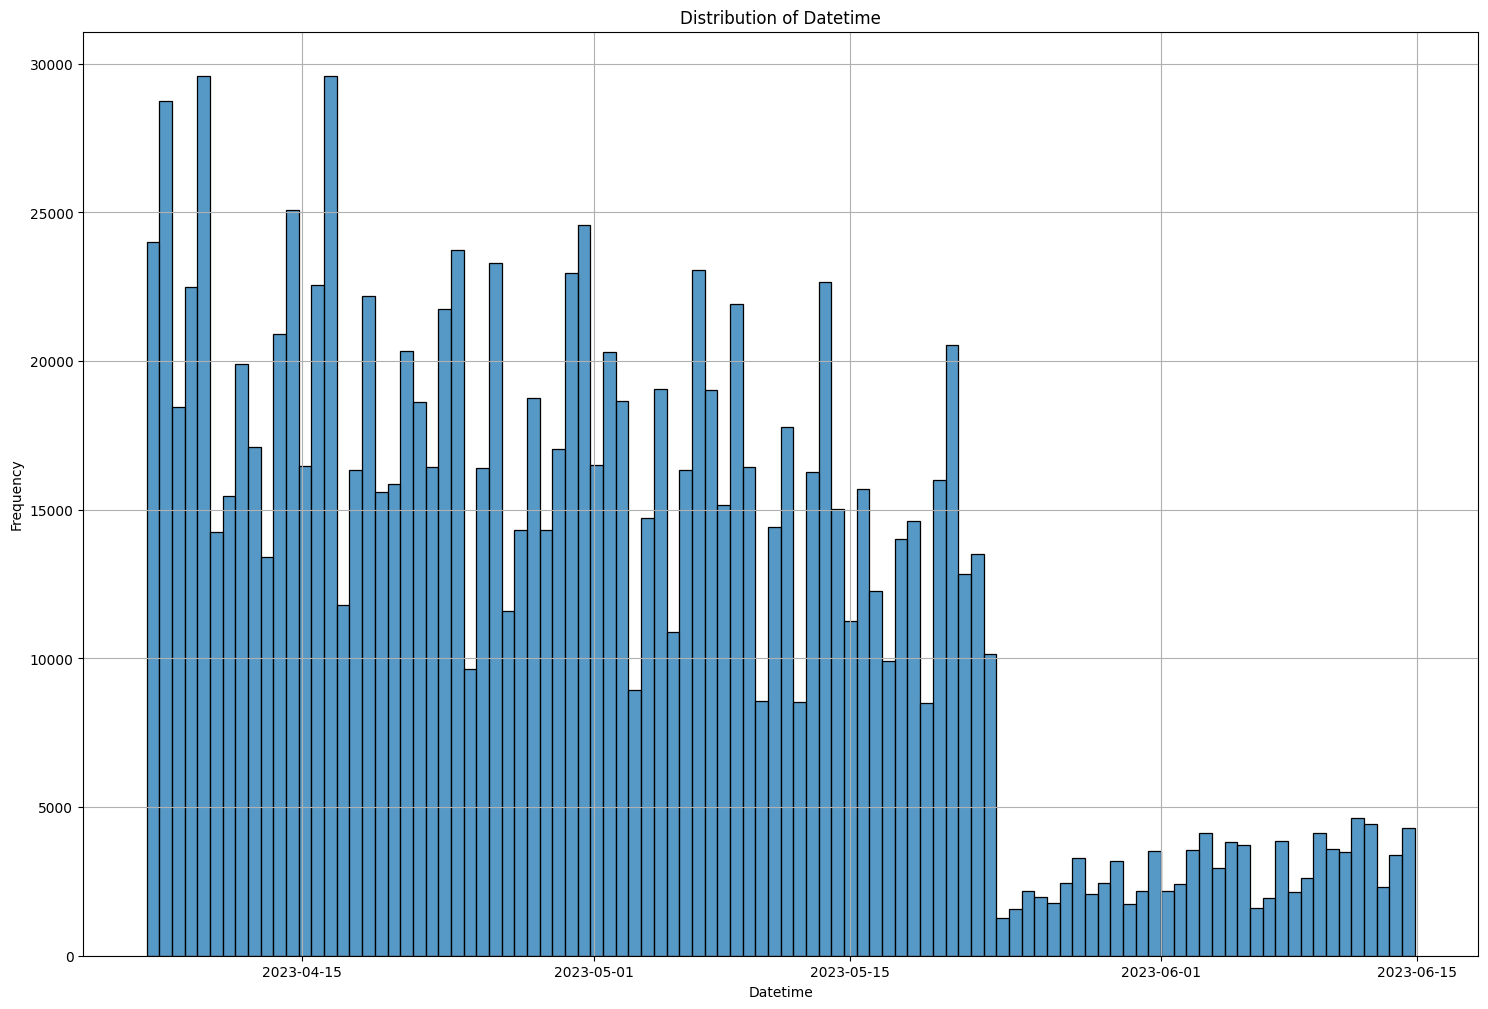

In [383]:
# Create a histogram to visualize the distribution of datetime values
plt.figure(figsize=(18, 12))
sns.histplot(train_df['datetime'], bins=100)
plt.title('Distribution of Datetime')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.grid()
plt.show()

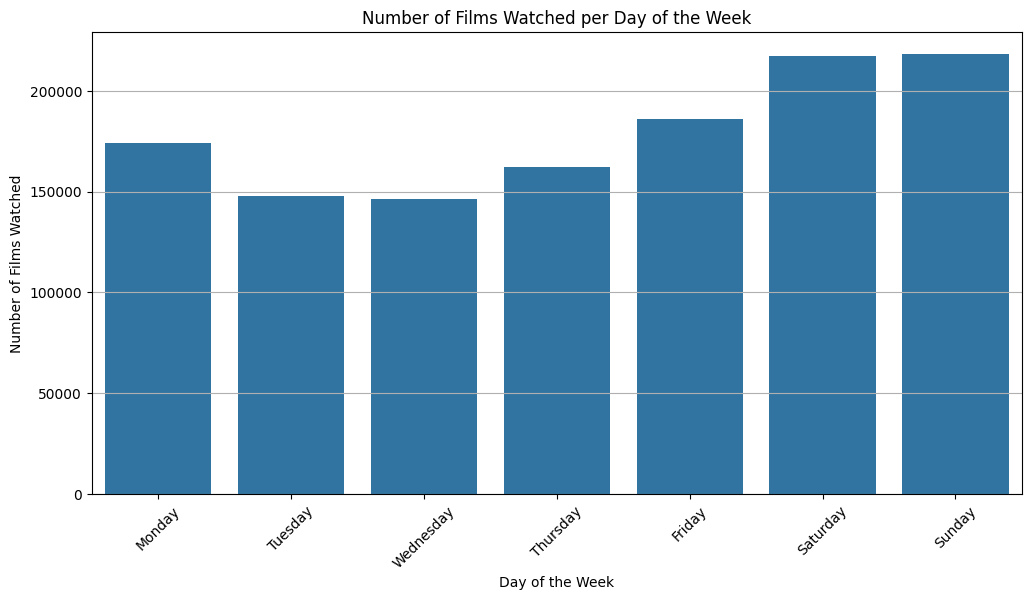

In [384]:
# Calculate the number of films watched for each day of the week and create a bar plot to visualize this data
train_df_copy = train_df.copy()
train_df_copy['day_of_week'] = train_df_copy['datetime'].dt.day_name()
films_per_day = train_df_copy.groupby('day_of_week')['movie_id'].count().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
sns.barplot(x=films_per_day.index, y=films_per_day.values)
plt.title('Number of Films Watched per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Films Watched')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

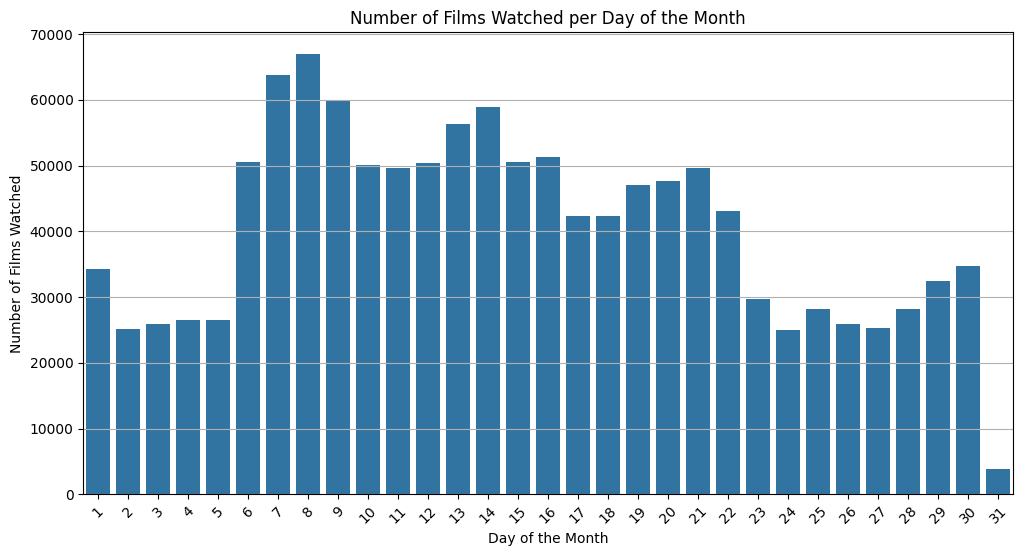

In [385]:
# Extract the day of the month, and plot the number of films watched for each day
train_df_copy['day_of_month'] = train_df_copy['datetime'].dt.day
films_per_day = train_df_copy.groupby('day_of_month')['movie_id'].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=films_per_day.index, y=films_per_day.values)
plt.title('Number of Films Watched per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Films Watched')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


In [386]:
# Display min and max duration
min_duration = train_df['duration'].min()
max_duration = train_df['duration'].max()
print(f"Minimum Duration: {min_duration}")
print(f"Maximum Duration: {max_duration}")

Minimum Duration: 1.0
Maximum Duration: 45738.0


In [387]:
# Statistics of the values in 'duration' column
pd.set_option('display.float_format', '{:.2f}'.format)
train_df['duration'].describe()


,duration
count,1251871.00
mean,2796.36
std,2736.54
min,1.00
25%,201.00
50%,1862.00
75%,5181.00
max,45738.00


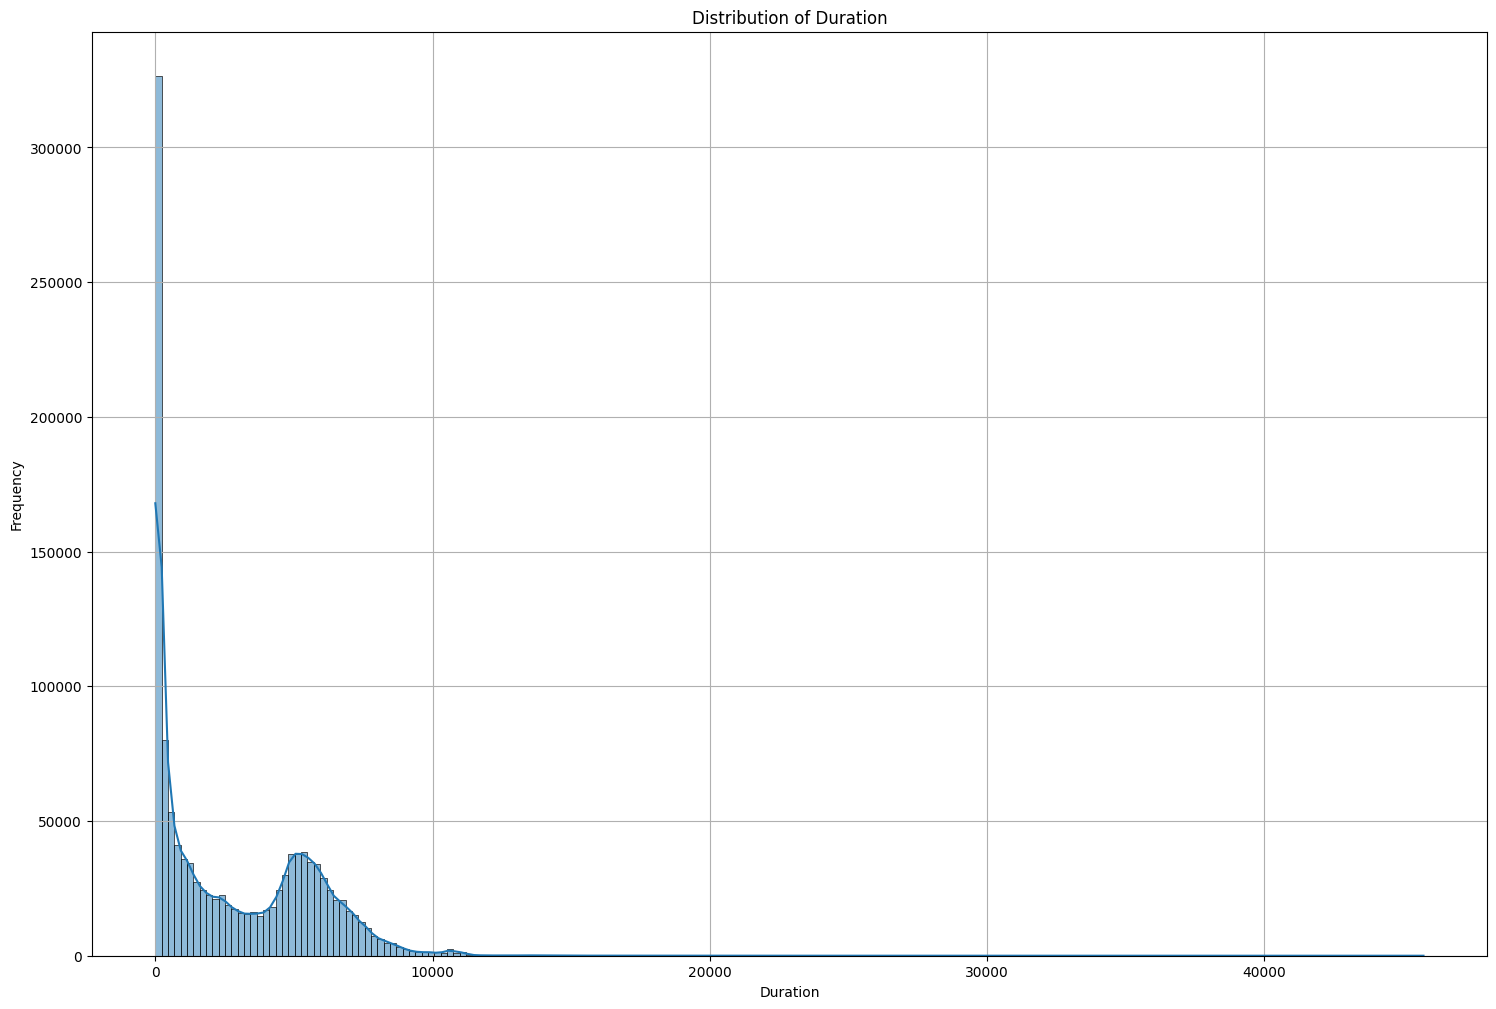

In [388]:
# Create a histogram visualize the distribution of interaction durations
plt.figure(figsize=(18, 12))
sns.histplot(train_df['duration'], bins=200, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid()
plt.show()

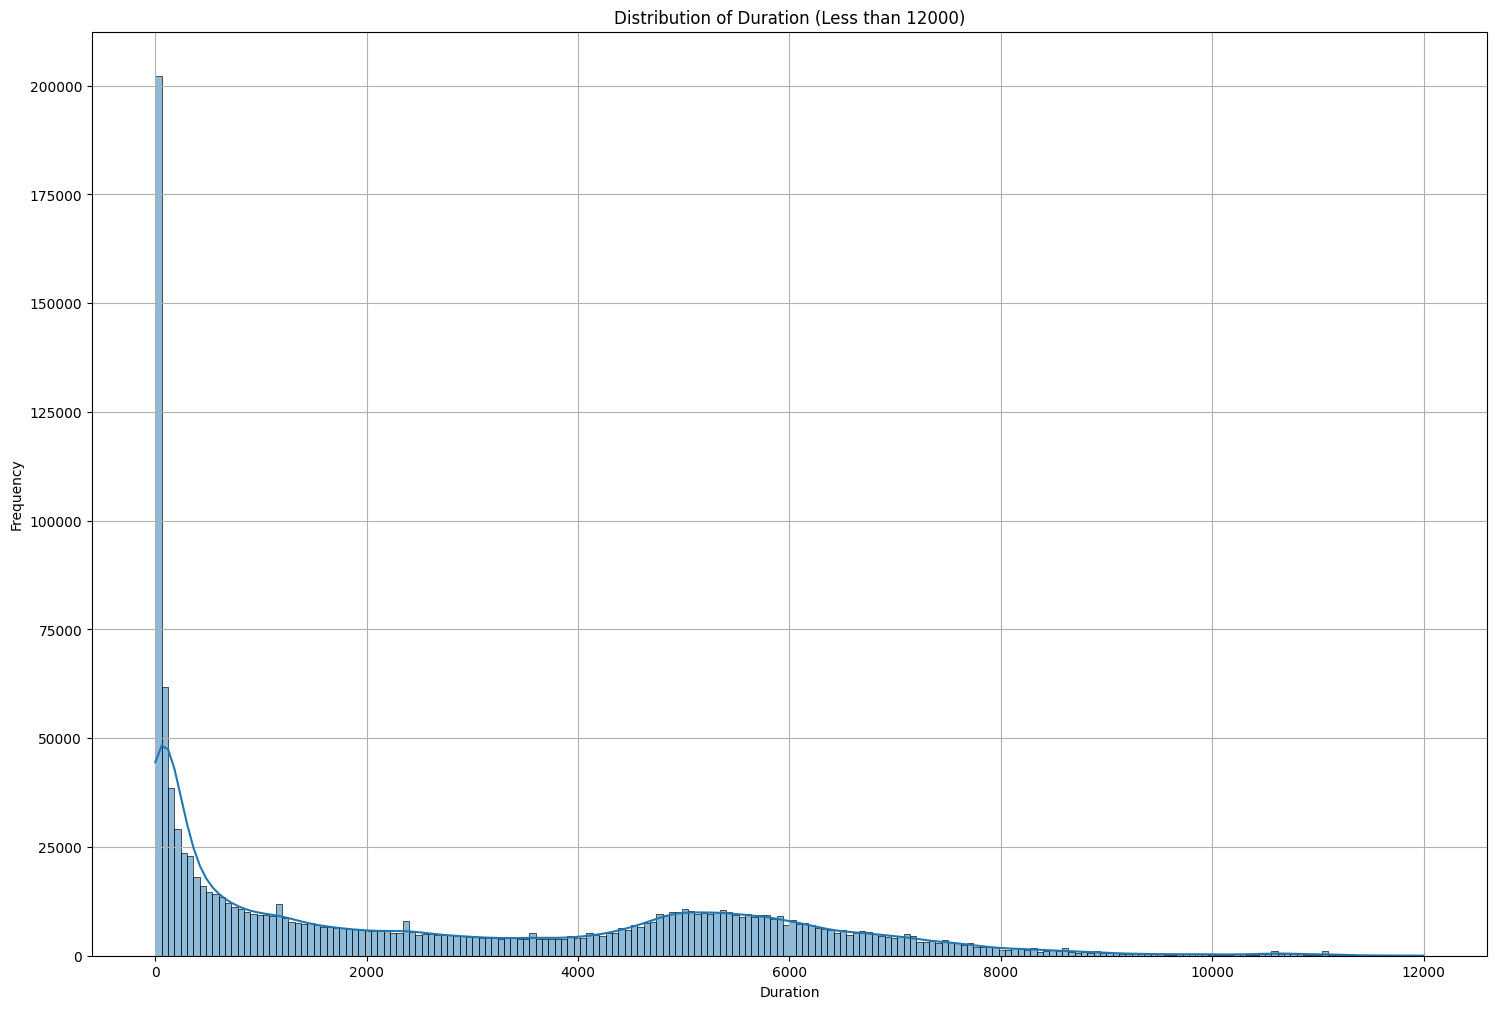

count   1250134.00
mean       2779.06
std        2695.75
min           1.00
25%         200.00
50%        1853.00
75%        5172.00
max       11999.00
Name: duration, dtype: float64
0   2.00
Name: duration, dtype: float64


In [389]:
# Filter the durations to include only those less than 12000, then create a histogram to visualize this subset and print summary statistics and the mode
filtered_duration_12000 = train_df[train_df['duration'] < 12000]['duration']
plt.figure(figsize=(18, 12))
sns.histplot(filtered_duration_12000, bins=200, kde=True)
plt.title('Distribution of Duration (Less than 12000)')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid()
plt.show()

print(filtered_duration_12000.describe())
print(filtered_duration_12000.mode())

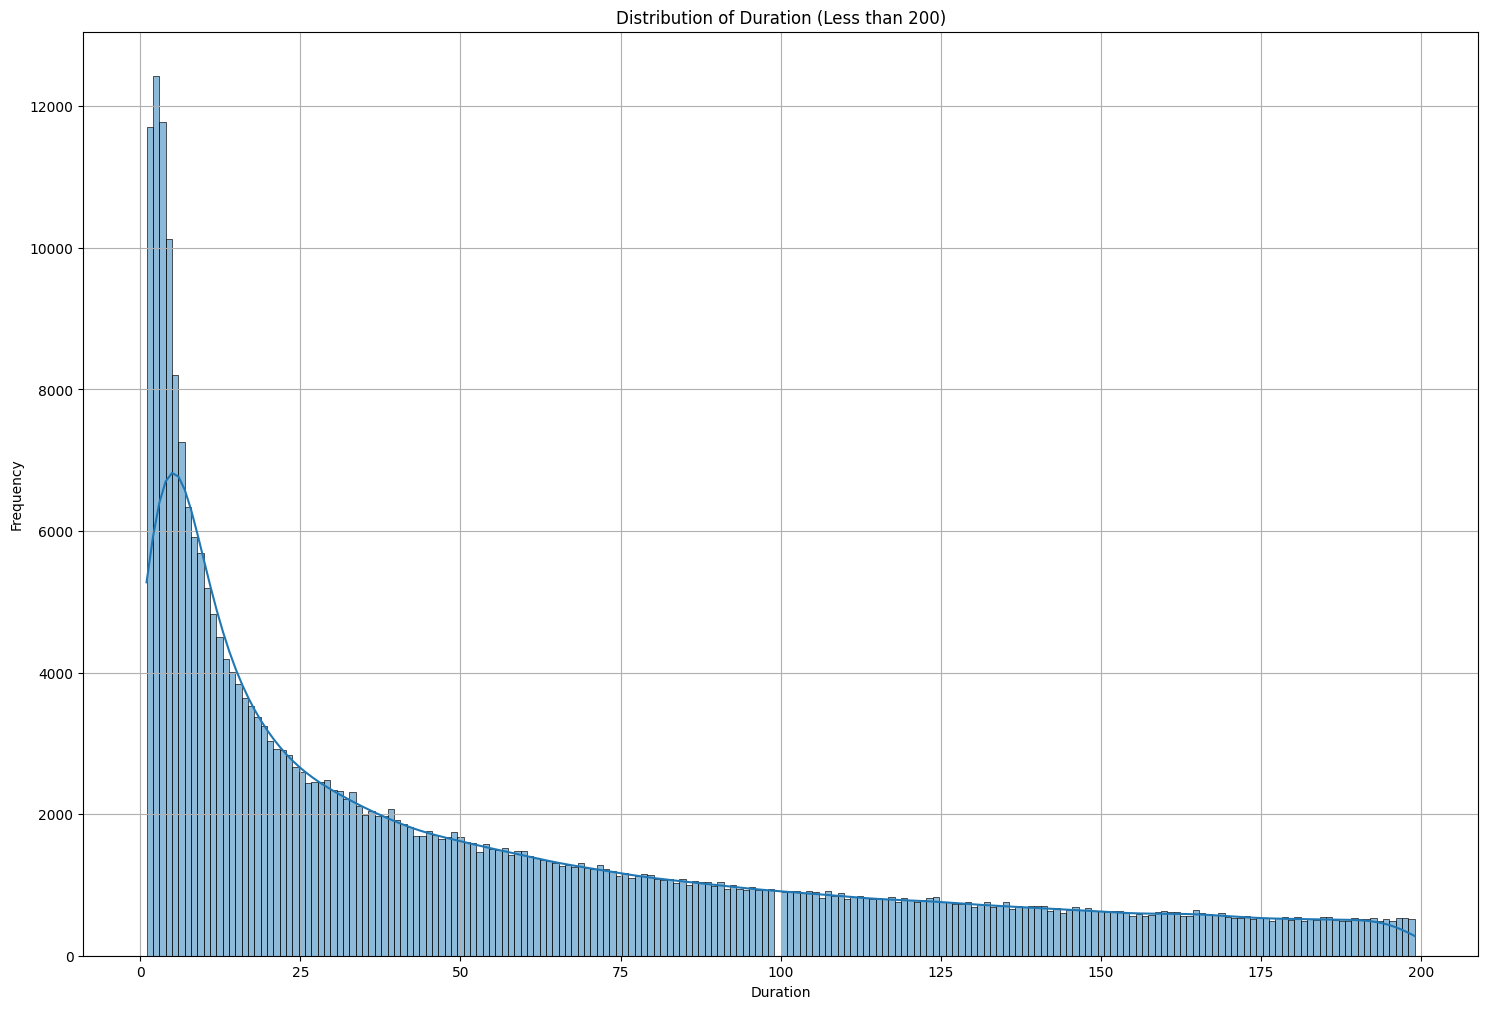

count   312340.00
mean        54.35
std         54.27
min          1.00
25%          9.00
50%         34.00
75%         87.00
max        199.00
Name: duration, dtype: float64
0   2.00
Name: duration, dtype: float64


In [390]:
# Filter the durations to include only those less than 200, then create a histogram to visualize this subset and print summary statistics and the mode
filtered_duration_200 = train_df[train_df['duration'] < 200]['duration']
plt.figure(figsize=(18, 12))
sns.histplot(filtered_duration_200, bins=200, kde=True)
plt.title('Distribution of Duration (Less than 200)')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid()
plt.show()

print(filtered_duration_200.describe())
print(filtered_duration_200.mode())

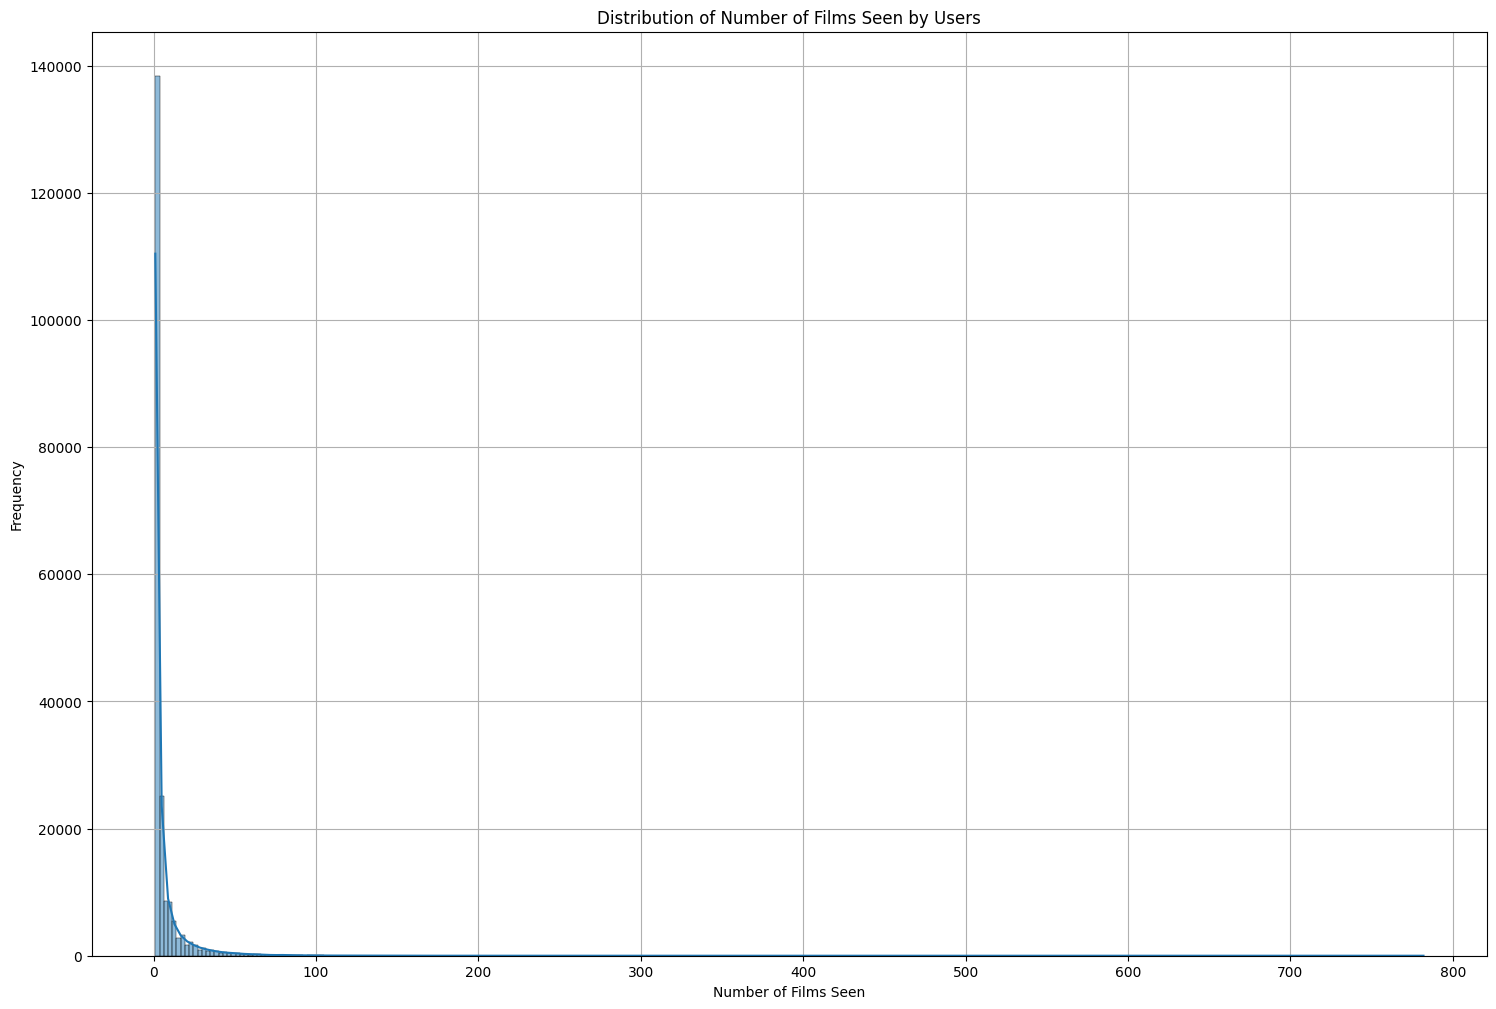

count   207377.00
mean         6.04
std         12.29
min          1.00
25%          1.00
50%          2.00
75%          5.00
max        782.00
Name: movie_id, dtype: float64
0    1
Name: movie_id, dtype: int64


In [391]:
# Group the data by user_id to count the number of films seen by each user, then create a histogram to visualize the distribution of these counts and print their summary statistics and mode.
film_counts = train_df.groupby('user_id')['movie_id'].count()
plt.figure(figsize=(18, 12))
sns.histplot(film_counts, bins=300, kde=True)
plt.title('Distribution of Number of Films Seen by Users')
plt.xlabel('Number of Films Seen')
plt.ylabel('Frequency')
plt.grid()
plt.show()
print(film_counts.describe())
print(film_counts.mode())

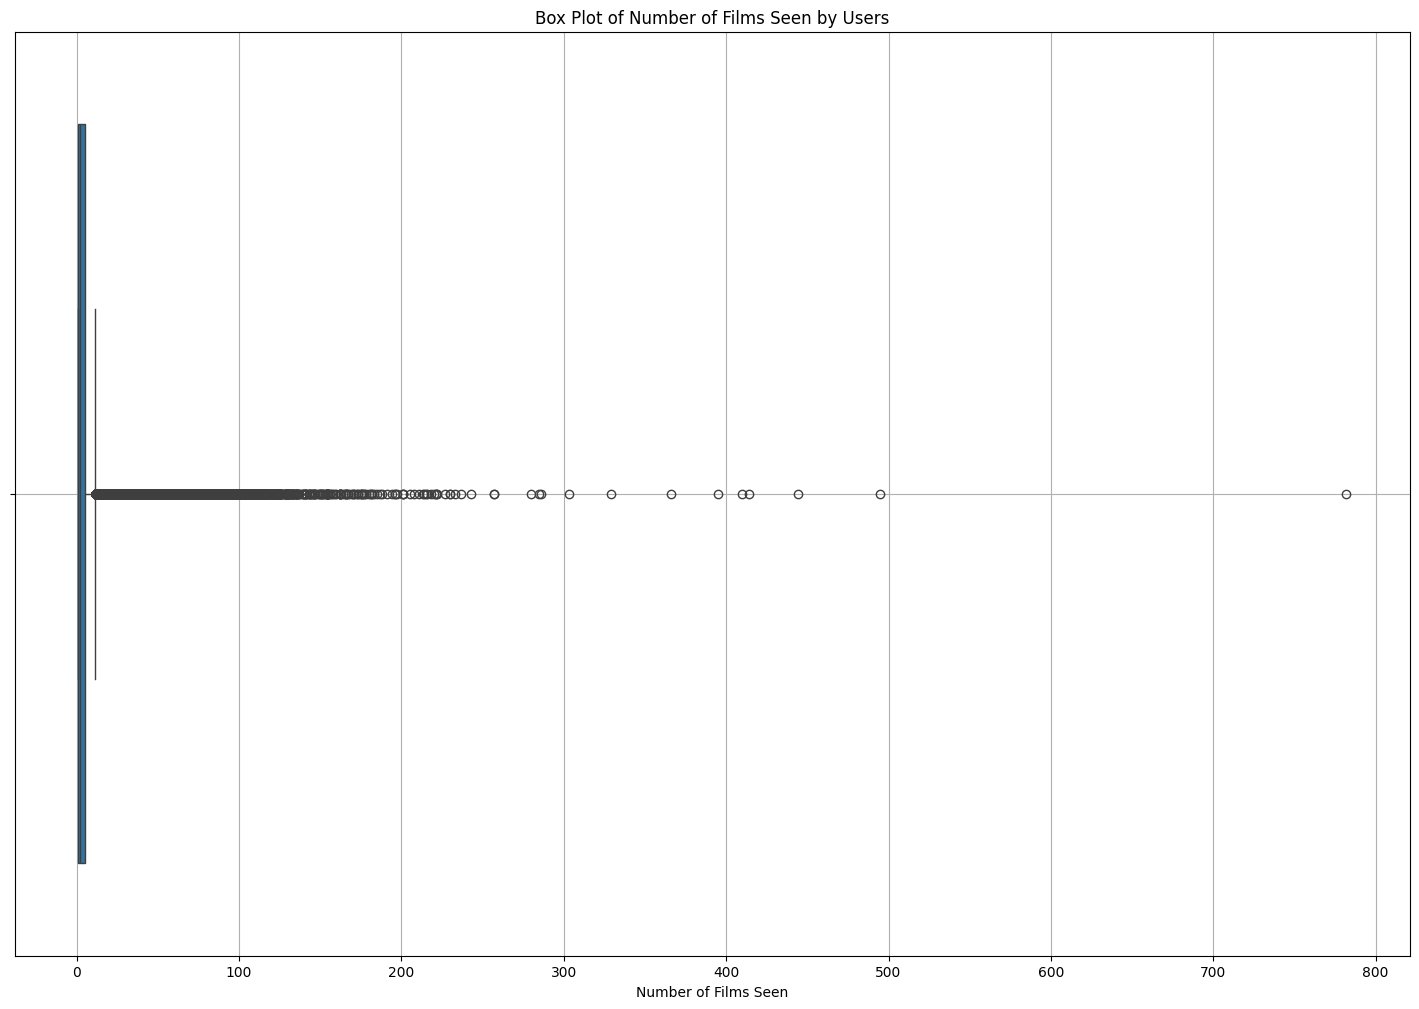

In [392]:
# Group the data by user_id to count the number of films seen by each user, then create a box plot to visualize the distribution of these counts
film_counts = train_df.groupby('user_id')['movie_id'].count()
plt.figure(figsize=(18, 12))
sns.boxplot(x=film_counts)
plt.title('Box Plot of Number of Films Seen by Users')
plt.xlabel('Number of Films Seen')
plt.grid()
plt.show()


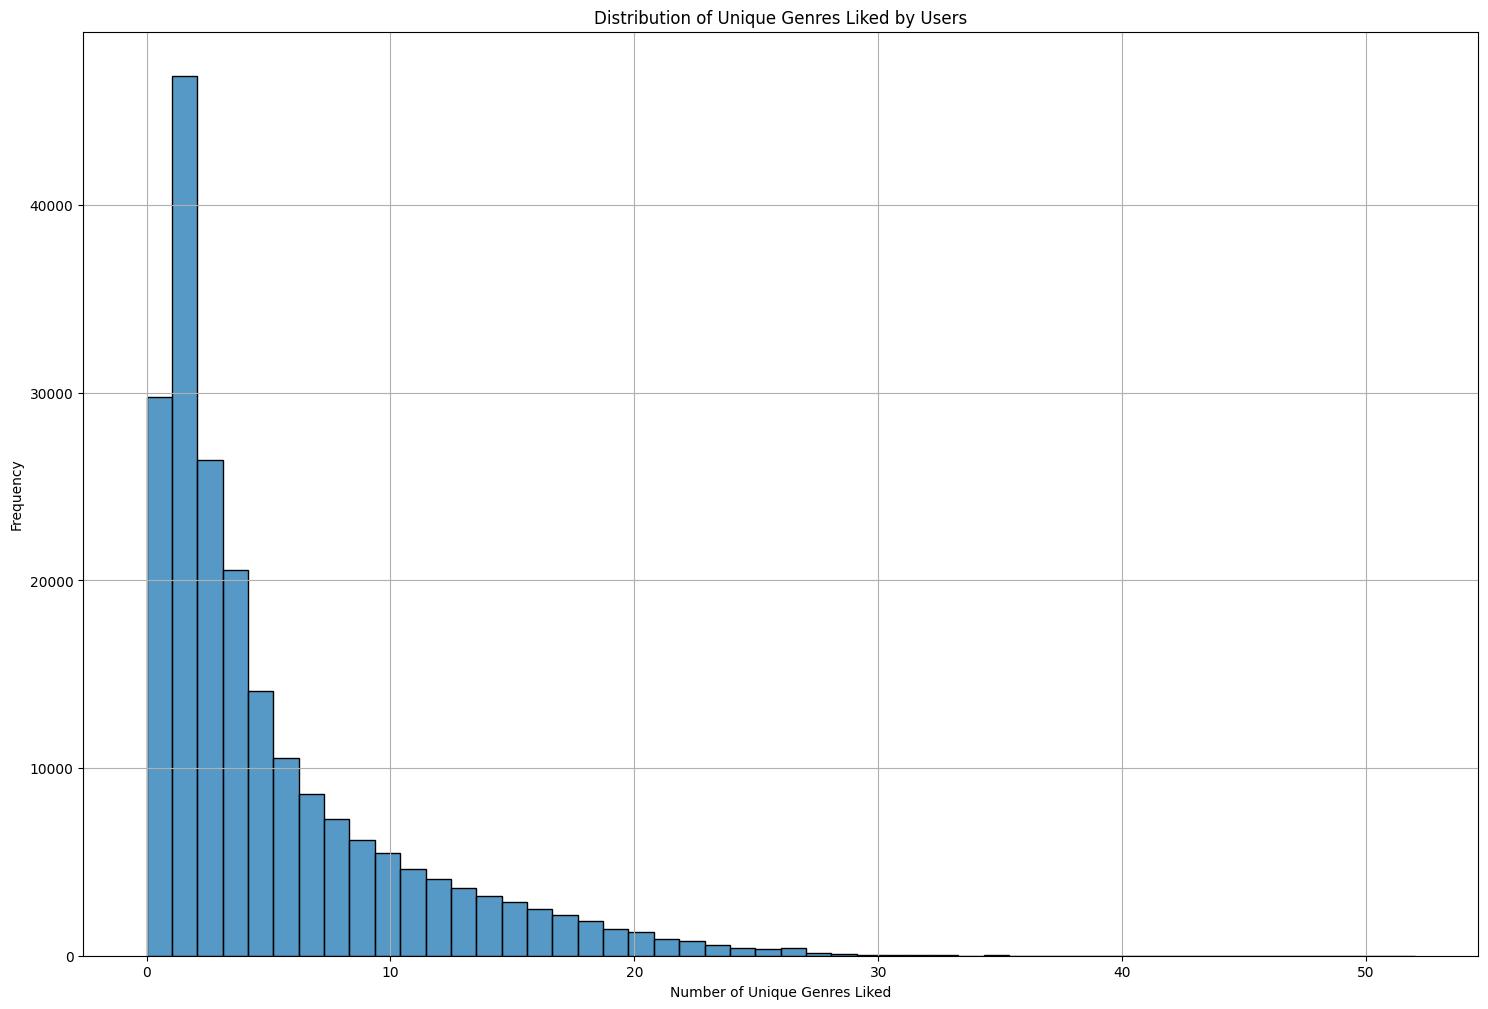

2

In [393]:
# Merge training data with film genres, explode the genres into separate rows, and visualize the distribution of unique genres liked by users with a histogram
merged_df = train_df.merge(items_df[['id', 'genres']], left_on='movie_id', right_on='id')
exploded_genres = merged_df.explode('genres')
genre_counts = exploded_genres.groupby('user_id')['genres'].nunique()
plt.figure(figsize=(18, 12))
sns.histplot(genre_counts, bins=50)
plt.title('Distribution of Unique Genres Liked by Users')
plt.xlabel('Number of Unique Genres Liked')
plt.ylabel('Frequency')
plt.grid()
plt.show()

genre_counts.describe()
genre_counts.mode()[0]

In [394]:
# Count the number of users who watched each film, identify the top 20 most popular films
popular_films = train_df.groupby('movie_id')['user_id'].count()
top_20_popular_films = popular_films.sort_values(ascending=False).head(20)
top_20_popular_films = top_20_popular_films.reset_index()
top_20_popular_films.rename(columns={'user_id': 'count'}, inplace=True)
top_20_with_titles = top_20_popular_films.merge(items_df[['id', 'title']], left_on='movie_id', right_on='id')
print(top_20_with_titles[['movie_id', 'title', 'count']])

    movie_id                             title  count
0     484.00                 Аватар: Путь воды  17053
1    6194.00                          Нюрнберг   6853
2     641.00                   Семейный бизнес   4830
3    2679.00                            Вечныe   4789
4    2820.00      Алёша Попович и Тугарин Змей   4662
5    5876.00  Черная пантера: Ваканда навсегда   4455
6    5336.00                   Смерть в Прерии   4434
7    2074.00                           Морбиус   4282
8    1978.00                           Веном 2   4169
9    2480.00                            Аватар   4084
10   5707.00                     Мортал Комбат   4031
11   1281.00                          13 минут   3930
12   4090.00                      Старый Генри   3845
13   5849.00                        Дочь волка   3660
14   5712.00                       Сезон измен   3537
15   1521.00               Миньоны: Грювитация   3477
16   5918.00                Тор: Любовь и гром   3413
17   4687.00                

### Output Analysis of Train Dataset

- The `train_df` dataset contains **1,251,871 entries**, organized into **5 columns**: `id`, `datetime`, `user_id`, `movie_id`, and `duration`. The `id` and `user_id` columns are of integer type, while the `datetime` column is of datetime type and the `duration` and `movie_id` columns are of float type. `movie_id` and `duration` column's type probably can be changed to integer. This will be taken into account at the data preprocessing stage.

- The `is_train` column, which contains only `True` values, indicates that all entries in this dataset are training samples. This column can be removed. This will be taken into account at the data preprocessing stage.

- The dataset has:
  - **1,251,871 unique values for `id`**,
  - **207,377 unique values for `user_id`**,
  - **5,269 unique values for `movie_id`**.
  This suggests a broad range of user interactions with various movies, but not with all of them.

- The dataset **does not contain any missing values**.

- The dataset spans from **April 6, 2023** to **June 14, 2023**. A distribution histogram of the `datetime` values shows significantly fewer entries during the early days of May and the beginning of June compared to previous period. Also there are 'waves' on hitrogram, that suggested to analyse ditribution of number of watched films by day of week and day of month.

- The analysis of films watched **per day of week** indicates a slight decrease from Monday to Tuesday and Wednesday, followed by an increase towards the end of the week, demonstrating user engagement patterns. The analysis of films watched **per day of month** reveals a sharp increase (around 2 times) in films watched after the 5th of each month, which shows strange patterns in user behaviour.

- The **minimum and maximum durations recorded** are **1.0** and **45,738.0**, respectively. A histogram of the `duration` reveals a significant peak at lower durations, a smaller peak around **5,000**, and a long tail extending toward higher durations. This raises questions about the measurement units used for duration.

  - Filtering out data points with durations above **12,000** shows that only **1,737 records** have a duration greater than **12,000**, with the peak around **5,000 minutes** suggesting that this may represent typical viewing time for one film (5000/3600 ≈ 1.3(8) hours).

  - Further analysis of films with durations less than **200**  shows a significant peak at **2**, indicating that some users might check a movie for only a few seconds before closing it. However, it's strange that the peak appears at just **2 seconds**.

  - If we hypothesize that the units are in **hours**, the emergence of this second peak would be questionable. On the other hand, if we assume the units are in **minutes**, the question of the second peak remains, and the lack of a peak at the expected film lengths (100-120 minutes) is notable. Therefore, the best solution is to assume that the unita are in **seconds**.

- The distribution of the number of films seen by users shows a mode of **1 film** per user, with a maximum of **782 films**. The histogram indicates that while most users engage with a small number of films, a few users have anomouly high activity, suggesting that the account used by several users.

- The distribution of the number of genres of films seen by users shows a mode of **2 genres** per user. This suggests that users generally engage with films that fit into a couple of genres, possibly indicating preferences for a specific set of themes. However, since most users have watched only 1 film, it limits our ability to strongly identify their preferred genres.

- The top 20 films by the number of unique users watching them are highlighted, with the most popular title being **"Аватар: Путь воды"** with **17,053 views**, followed by titles like **"Нюрнберг"** (6853 views) and **"Семейный бизнес"** (4830 views).

# 2. Data Preprocessing

## 2.1 Preprocessing of the main datasets for training

In [395]:
train_df

,id,datetime,user_id,movie_id,duration,is_train
0,0,2023-04-06 15:00:00.071114+03:00,10250,427.00,485.00,True
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521.00,129.00,True
2,2,2023-04-06 15:00:03.957246+03:00,12980,4598.00,2795.00,True
3,3,2023-04-06 15:00:04.990565+03:00,30646,5324.00,5094.00,True
4,4,2023-04-06 15:00:10.495017+03:00,43069,4291.00,75.00,True
...,...,...,...,...,...,...
1251866,2477876,2023-06-14 23:59:02.925097+03:00,31874,7367.00,770.00,True
1251867,2477879,2023-06-14 23:59:06.073919+03:00,74122,1847.00,2908.00,True
1251868,2477890,2023-06-14 23:59:33.756448+03:00,112950,2784.00,345.00,True
1251869,2477898,2023-06-14 23:59:50.429716+03:00,34303,1520.00,2021.00,True


In [396]:
# Convert movie_id column to int
train_df['movie_id'] = train_df['movie_id'].astype(int)
train_df

,id,datetime,user_id,movie_id,duration,is_train
0,0,2023-04-06 15:00:00.071114+03:00,10250,427,485.00,True
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521,129.00,True
2,2,2023-04-06 15:00:03.957246+03:00,12980,4598,2795.00,True
3,3,2023-04-06 15:00:04.990565+03:00,30646,5324,5094.00,True
4,4,2023-04-06 15:00:10.495017+03:00,43069,4291,75.00,True
...,...,...,...,...,...,...
1251866,2477876,2023-06-14 23:59:02.925097+03:00,31874,7367,770.00,True
1251867,2477879,2023-06-14 23:59:06.073919+03:00,74122,1847,2908.00,True
1251868,2477890,2023-06-14 23:59:33.756448+03:00,112950,2784,345.00,True
1251869,2477898,2023-06-14 23:59:50.429716+03:00,34303,1520,2021.00,True


In [397]:
# Identify float values in the duration column that would change upon conversion to int; if none, convert the column to int.
differing_values = train_df[train_df['duration'] != train_df['duration'].astype(int)]
if differing_values.empty:
    train_df['duration'] = train_df['duration'].astype(int)
train_df

,id,datetime,user_id,movie_id,duration,is_train
0,0,2023-04-06 15:00:00.071114+03:00,10250,427,485,True
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521,129,True
2,2,2023-04-06 15:00:03.957246+03:00,12980,4598,2795,True
3,3,2023-04-06 15:00:04.990565+03:00,30646,5324,5094,True
4,4,2023-04-06 15:00:10.495017+03:00,43069,4291,75,True
...,...,...,...,...,...,...
1251866,2477876,2023-06-14 23:59:02.925097+03:00,31874,7367,770,True
1251867,2477879,2023-06-14 23:59:06.073919+03:00,74122,1847,2908,True
1251868,2477890,2023-06-14 23:59:33.756448+03:00,112950,2784,345,True
1251869,2477898,2023-06-14 23:59:50.429716+03:00,34303,1520,2021,True


In [398]:
# Remove is_train column
train_df = train_df.drop(columns=['is_train'])
train_df

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06 15:00:00.071114+03:00,10250,427,485
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521,129
2,2,2023-04-06 15:00:03.957246+03:00,12980,4598,2795
3,3,2023-04-06 15:00:04.990565+03:00,30646,5324,5094
4,4,2023-04-06 15:00:10.495017+03:00,43069,4291,75
...,...,...,...,...,...
1251866,2477876,2023-06-14 23:59:02.925097+03:00,31874,7367,770
1251867,2477879,2023-06-14 23:59:06.073919+03:00,74122,1847,2908
1251868,2477890,2023-06-14 23:59:33.756448+03:00,112950,2784,345
1251869,2477898,2023-06-14 23:59:50.429716+03:00,34303,1520,2021


In [399]:
# Aggregate values of movies per each user
train_df_agg = train_df.groupby("user_id").agg({"movie_id": list}).reset_index()
train_df_agg

,user_id,movie_id
0,0,"[165, 107, 6013, 2869, 5558, 5928, 850, 840, 4..."
1,1,"[6360, 6717, 2851, 2447, 1229, 5720, 1647, 732..."
2,2,"[6865, 5466, 2224, 3583, 1451, 138, 1996, 2455..."
3,3,"[1954, 4743, 3452, 3814, 5537, 6167, 6615, 311..."
4,4,"[4153, 1147, 1496, 6615, 1697, 3812, 4801, 158..."
...,...,...
207372,263866,[2348]
207373,263868,[6918]
207374,263870,[6207]
207375,263873,[5336]


## 2.2 Prepare data to test code execution and avoid errors after training models on the full dataset.

### 2.1.1 Small dataset of real data

In [400]:
# Create small versions of the training and test DataFrames
train_df_small = train_df[(train_df['user_id'] < 1000)].copy()
train_user_ids_small = train_df_small['user_id'].unique()
train_movie_ids_small = train_df_small['movie_id'].unique()
print(len(train_user_ids_small), len(train_movie_ids_small))
print(train_df.head(5))

test_df_small = test_df.explode('movie_id')
test_df_small = test_df_small[(test_df_small['user_id'].isin(train_user_ids_small) & (test_df_small['movie_id'].isin(train_movie_ids_small)))]
test_df_small = test_df_small.groupby("user_id").agg({"movie_id": list}).reset_index()
print(len(test_df_small))
print(test_df_small.head(5))

train_df_small_agg = train_df_small.groupby("user_id").agg({"movie_id": list}).reset_index()
print(train_df_small_agg.head(5))

998 4483
   id                         datetime  user_id  movie_id  duration
0   0 2023-04-06 15:00:00.071114+03:00    10250       427       485
1   1 2023-04-06 15:00:01.123928+03:00     2062      1521       129
2   2 2023-04-06 15:00:03.957246+03:00    12980      4598      2795
3   3 2023-04-06 15:00:04.990565+03:00    30646      5324      5094
4   4 2023-04-06 15:00:10.495017+03:00    43069      4291        75
978
   user_id                                           movie_id
0        0  [12.0, 6201.0, 5542.0, 2025.0, 190.0, 5358.0, ...
1        1  [2515.0, 1540.0, 5210.0, 1608.0, 3590.0, 7215....
2        2  [5998.0, 190.0, 7327.0, 947.0, 3814.0, 876.0, ...
3        3  [4812.0, 3935.0, 802.0, 4459.0, 4340.0, 5975.0...
4        4  [195.0, 800.0, 2266.0, 6634.0, 7412.0, 3705.0,...
   user_id                                           movie_id
0        0  [165, 107, 6013, 2869, 5558, 5928, 850, 840, 4...
1        1  [6360, 6717, 2851, 2447, 1229, 5720, 1647, 732...
2        2  [6865, 54

# 3. Given code for model evaluation and base model

In [401]:
# ACHTUNG! DO NOT TOUCH

def ndcg_metric(gt_items: np.ndarray, predicted: np.ndarray) -> float:
    at = len(predicted)
    relevance = np.array([1 if x in predicted else 0 for x in gt_items])
    # DCG uses the relevance of the recommended items
    rank_dcg = dcg(relevance)
    if rank_dcg == 0.0:
        return 0.0

    # IDCG has all relevances to 1 (or the values provided), up to the number of items in the test set that can fit in the list length
    ideal_dcg = dcg(np.sort(relevance)[::-1][:at])

    if ideal_dcg == 0.0:
        return 0.0

    ndcg_ = rank_dcg / ideal_dcg

    return ndcg_


def dcg(scores: np.ndarray) -> float:
    return np.sum(
        np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)), dtype=np.float64
    )


def recall_metric(gt_items: np.ndarray, predicted: np.ndarray) -> float:
    n_gt = len(gt_items)
    intersection = len(set(gt_items).intersection(set(predicted)))
    return intersection / n_gt


def evaluate_recommender(df: pd.DataFrame, model_preds_col: str, gt_col: str = "movie_id") -> Dict[str, float]:
    metric_values = []

    for _, row in df.iterrows():
        metric_values.append(
            (ndcg_metric(row[gt_col], row[model_preds_col]), recall_metric(row[gt_col], row[model_preds_col]))
        )

    return {"ndcg": np.mean([x[0] for x in metric_values]), "recall": np.mean([x[1] for x in metric_values])}

In [402]:
class BaseRecommender(ABC):
    def __init__(self):
        self.trained = False

    @abstractmethod
    def fit(self, df: pd.DataFrame) -> None:
        # реализация может быть любой, никаких ограничений
        # не забудьте про
        self.trained = True

    @abstractmethod
    def predict(self, df: pd.DataFrame, topn: int = 10) -> List[np.ndarray]:
        # реализация может быть любой, НО
        # должен возвращать список массивов из movie_id, которые есть в `item_df`, чтобы корректно работал подсчет метрик
        pass

In [403]:
class TopPopular(BaseRecommender):
    def __init__(self):
        super().__init__()

    def fit(self, df: pd.DataFrame, item_id_col: str = "movie_id") -> None:
        # считаем популярность айтемов
        self.recommendations = df[item_id_col].value_counts().index.values
        self.trained = True

    def predict(self, df: pd.DataFrame, topn: int = 10) -> np.ndarray:
        assert self.trained
        # возвращаем для всех одно и то же
        return [self.recommendations[:topn]] * len(df)


toppop = TopPopular()
toppop.fit(train_df)
test_df["toppopular_recs"] = toppop.predict(test_df)
test_df.head()

,user_id,movie_id,toppopular_recs
0,0,"[12.0, 6201.0, 5542.0, 2025.0, 190.0, 5358.0, ...","[484, 6194, 641, 2679, 2820, 5876, 5336, 2074,..."
1,1,"[2515.0, 1540.0, 5210.0, 1608.0, 3590.0, 7215....","[484, 6194, 641, 2679, 2820, 5876, 5336, 2074,..."
2,2,"[5998.0, 190.0, 7327.0, 947.0, 3814.0, 876.0, ...","[484, 6194, 641, 2679, 2820, 5876, 5336, 2074,..."
3,3,"[4812.0, 3935.0, 802.0, 4459.0, 4340.0, 5975.0...","[484, 6194, 641, 2679, 2820, 5876, 5336, 2074,..."
4,4,"[152.0, 195.0, 800.0, 2266.0, 6634.0, 7412.0, ...","[484, 6194, 641, 2679, 2820, 5876, 5336, 2074,..."


In [404]:
evaluate_recommender(df=test_df, model_preds_col="toppopular_recs")

{'ndcg': 0.1213225408775555, 'recall': 0.05789212284812527}

In [405]:
test_df.drop("toppopular_recs", axis=1, inplace=True)

# 4. Models

In [ ]:
train_df

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06 15:00:00.071114+03:00,10250,427,485
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521,129
2,2,2023-04-06 15:00:03.957246+03:00,12980,4598,2795
3,3,2023-04-06 15:00:04.990565+03:00,30646,5324,5094
4,4,2023-04-06 15:00:10.495017+03:00,43069,4291,75
...,...,...,...,...,...
1251866,2477876,2023-06-14 23:59:02.925097+03:00,31874,7367,770
1251867,2477879,2023-06-14 23:59:06.073919+03:00,74122,1847,2908
1251868,2477890,2023-06-14 23:59:33.756448+03:00,112950,2784,345
1251869,2477898,2023-06-14 23:59:50.429716+03:00,34303,1520,2021


In [ ]:
test_df

,user_id,movie_id
0,0,"[12.0, 6201.0, 5542.0, 2025.0, 190.0, 5358.0, ..."
1,1,"[2515.0, 1540.0, 5210.0, 1608.0, 3590.0, 7215...."
2,2,"[5998.0, 190.0, 7327.0, 947.0, 3814.0, 876.0, ..."
3,3,"[4812.0, 3935.0, 802.0, 4459.0, 4340.0, 5975.0..."
4,4,"[152.0, 195.0, 800.0, 2266.0, 6634.0, 7412.0, ..."
...,...,...
66895,176506,[1515.0]
66896,176519,[4167.0]
66897,176525,[5947.0]
66898,176531,[5514.0]


## 4.1 Content Based Recommender

Content-based recommendation algorithms are effective in suggesting items to users by analyzing the content of items. Useful when:

- Not enough collaborative data
- Since recommendations are based on item features interpretability is more clear
- Efficient handling of new items

I chose this approach because the dataset shows that many users have only watched a few movies, making it difficult to define their preferences purely through collaborative filtering methods. A content-based recommender can recommend movies based on the movies' descriptions and other features.


### Cosine Similarity and Count Vectorizer

#### Overview
Cosine similarity is a metric used to measure how similar two vectors are, regardless of their magnitude. The Count Vectorizer is a tool that converts a collection of text documents into a matrix of token counts, facilitating the calculation of cosine similarity.

#### Key Concepts

- **Cosine Similarity**:
  - Measures the cosine of the angle between two non-zero vectors. The value ranges from -1 (completely dissimilar) to 1 (completely similar).
- **Count Vectorizer**:
  - A feature extraction technique that converts text documents into a matrix of token counts. Each unique word is represented as a feature, and its occurrence in a document is represented as a count.

#### Advantages
- Allows for effective comparison of text data by quantifying similarity.
- Works well with high-dimensional data, making it suitable for work with text in recommendation tasks.

#### Disadvantages
- Count Vectorizer does not consider the context or meaning of words and simply counts occurrences.
- Cosine similarity may not perform well with very sparse data or when there are significant differences in the lengths of the vectors being compared.


In [ ]:
class ContentBasedRecommender(BaseRecommender):
    """
    Content-Based Recommender System Class
    This class implements a content-based recommendation strategy, utilizing movie attributes
    such as title, year, description, and keywords to recommend similar movies based on user preferences.
    """

    def __init__(self) -> None:
        """
        Initialize the ContentBasedRecommender.
        This sets up the necessary attributes and downloads stopwords for preprocessing.
        """
        super().__init__()
        self.watched_movies_dict = {}  # Dictionary to map user IDs to their watched movies
        self.similarity = None  # Similarity matrix for movie comparisons
        self.movies = None  # DataFrame to store movie details
        self.cv = None  # CountVectorizer instance for text vectorization
        self.movie_id_to_index = {}  # Mapping of movie IDs to DataFrame indices

        # Download stopwords for English and Russian languages
        nltk.download('stopwords')
        english_stop_words = stopwords.words('english')
        russian_stop_words = stopwords.words('russian')
        self.combined_stop_words = english_stop_words + russian_stop_words

    def fit(self, train_df: pd.DataFrame, items_df: pd.DataFrame, item_id_col: str = "movie_id") -> None:
        """
        Fit the recommender to the training data.

        Parameters:
            train_df (pd.DataFrame): The DataFrame containing user interaction data.
            items_df (pd.DataFrame): The DataFrame containing movie metadata.
            item_id_col (str): The column name for item IDs (default is "movie_id").
        """
        # Preprocess and vectorize movie data
        self.movies = self.preprocess_data(items_df)
        self.similarity, self.cv = self.vectorize_data(self.movies)
        self.movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(self.movies['id'])}  # Create the mapping
        self.watched_movies_dict = self.create_watched_movies_dict(train_df, item_id_col)  # Create watched movies dictionary
        self.trained = True  # Mark the model as trained

    def preprocess_data(self, items_df: pd.DataFrame) -> pd.DataFrame:
        """
        Preprocess the dataset to create 'tags' and drop unnecessary columns.

        Parameters:
            items_df (pd.DataFrame): The DataFrame containing movie metadata.

        Returns:
            pd.DataFrame: The preprocessed DataFrame with 'tags' created from relevant columns.
        """
        items_df['year'] = items_df['year'].astype(str)  # Ensure 'year' is a string
        items_df['tags'] = (
            items_df['title'].fillna('') + ' ' +
            items_df['year'].fillna('') + ' ' +
            items_df['description'].fillna('') + ' ' +
            items_df['keywords'].fillna('').apply(lambda x: ', '.join(x))
        ).str.lower()  # Create 'tags' by combining fields

        return items_df[['id', 'title', 'tags']]  # Return relevant columns

    def vectorize_data(self, new_data: pd.DataFrame) -> tuple:
        """
        Vectorize the tags and compute cosine similarity.

        Parameters:
            new_data (pd.DataFrame): The DataFrame with movie tags to vectorize.

        Returns:
            tuple: A tuple containing the similarity matrix and CountVectorizer instance.
        """
        cv = CountVectorizer(max_features=1000, stop_words=self.combined_stop_words)  # Initialize CountVectorizer
        vector = cv.fit_transform(new_data['tags'])  # Vectorize the tags
        similarity = cosine_similarity(vector)  # Compute cosine similarity
        return similarity, cv  # Return similarity matrix and CountVectorizer

    def create_watched_movies_dict(self, train_df: pd.DataFrame, item_id_col: str = "movie_id") -> dict:
        """
        Create a dictionary mapping user IDs to their watched movies.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").

        Returns:
            dict: A dictionary with user IDs as keys and sets of watched movie IDs as values.
        """
        watched_movies_dict = {}  # Initialize dictionary
        user_groups = train_df.groupby('user_id')  # Group by user ID
        for user_id, group in tqdm(user_groups, desc="Training", unit="user"):
            watched_movies_dict[user_id] = set(group[item_id_col])  # Add watched movies for each user
        return watched_movies_dict  # Return the dictionary

    def predict(self, df: pd.DataFrame, topn: int = 10) -> np.ndarray:
        """
        Predict top N movie recommendations for each user.

        Parameters:
            df (pd.DataFrame): The DataFrame containing user IDs for predictions.
            topn (int): The number of top recommendations to return (default is 10).

        Returns:
            np.ndarray: An array of recommended movie IDs for each user.
        """
        assert self.trained, "Model must be trained before making predictions."  # Ensure the model is trained
        recommendations = []  # List to store recommendations

        for _, row in tqdm(df.iterrows(), desc="Predicting", total=len(df), unit="user"):
            user_id = row['user_id']  # Get user ID from DataFrame
            recommended_movies = self.recommend(user_id, topn)  # Get recommendations for the user
            recommendations.append(recommended_movies)  # Append recommendations

        return recommendations  # Return all recommendations

    def recommend(self, user_id: int, num_recommendations: int = 10) -> list:
        """
        Recommend movies for a specific user based on previous interactions.

        Parameters:
            user_id (int): The ID of the user for whom to recommend movies.
            num_recommendations (int): The number of recommendations to make (default is 10).

        Returns:
            list: A list of recommended movie IDs.
        """
        watched_movies = self.watched_movies_dict.get(user_id, set())  # Get watched movies for the user
        recommendations = []  # List to store recommendations

        for movie_id in watched_movies:  # Iterate through watched movies
            index = self.movie_id_to_index.get(movie_id)  # Get index of the movie
            if index is not None:
                distances = sorted(enumerate(self.similarity[index]), key=lambda x: x[1], reverse=True)  # Get sorted distances

                for i in distances:  # Iterate through sorted distances
                    recommended_movie_index = i[0]
                    if self.movies.iloc[recommended_movie_index]['id'] not in watched_movies:  # Check if not already watched
                        recommendations.append(self.movies.iloc[recommended_movie_index]['id'])  # Append recommended movie
                    if len(recommendations) >= num_recommendations:  # Stop if enough recommendations
                        break
            if len(recommendations) >= num_recommendations * len(watched_movies):  # Stop if all watched movies are processed
                break

        while len(recommendations) < num_recommendations:  # Fill up recommendations if not enough
            recommendations.append(0)  # Append placeholder (0)

        return recommendations  # Return the list of recommendations

    def save_model(self, file_path: str) -> None:
        """
        Save the model to a file.

        Parameters:
            file_path (str): The path where the model should be saved.
        """
        model_data = {
            'similarity': self.similarity,
            'cv': self.cv,
            'movies': self.movies,
            'watched_movies_dict': self.watched_movies_dict,
            'movie_id_to_index': self.movie_id_to_index
        }
        with open(file_path, 'wb') as file:
            pickle.dump(model_data, file)  # Save model data using pickle
        print(f"Model saved to {file_path}")  # Confirm save operation

    def load_model(self, file_path: str) -> None:
        """
        Load the model from a file.

        Parameters:
            file_path (str): The path from which to load the model.
        """
        with open(file_path, 'rb') as file:
            model_data = pickle.load(file)  # Load model data using pickle
            self.similarity = model_data['similarity']
            self.cv = model_data['cv']
            self.movies = model_data['movies']
            self.watched_movies_dict = model_data['watched_movies_dict']
            self.movie_id_to_index = model_data['movie_id_to_index']
            self.trained = True  # Mark the model as trained
        print(f"Model loaded from {file_path}")  # Confirm load operation



In [406]:
recommender = ContentBasedRecommender()
recommender.fit(train_df_small, items_df)
recommender.save_model('content_based_recommender.pkl')
# recommender.load_model('content_based_recommender.pkl')
test_df_small['content_based_rcs'] = recommender.predict(test_df_small)
evaluate_recommender(test_df_small, model_preds_col="content_based_rcs")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training:   0%|          | 0/998 [00:00<?, ?user/s]

Model saved to content_based_recommender.pkl


Predicting:   0%|          | 0/978 [00:00<?, ?user/s]

{'ndcg': 0.01919511362671948, 'recall': 0.0018625196575978893}

## 4.2 Graphs

Graph-based recommendation systems utilize the relationships and interactions among users and items to generate personalized suggestions. This approach is particularly effective in capturing complex patterns of user behavior. Useful when:

- Graphs can naturally represent user-item interactions as edges between nodes, allowing for a comprehensive view of the connections between users and items.
- Can efficiently adapt to changes in user preferences by continuously updating the graph structure based on new interactions.

I chose this approach because it allows us to effectively capture the  relationships between users and make more accurate predictions.

The usage of graphs in ML is very interesting, and I started to watch this [playlist](https://youtube.com/playlist?list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn&si=HoclIw4-dmmpMxu8) (watched 15/60)


In [407]:
class GraphRecommender(BaseRecommender):
    def __init__(self):
        """Initialize the Graph Recommender."""
        super().__init__()
        self.graph = None  # Initialize the graph to None
        self.movie_nodes = set()  # Set to store unique movie nodes
        self.trained = False  # Flag to indicate if the model has been trained

    def fit(self, train_df: pd.DataFrame) -> None:
        """Fit the recommender model using the training DataFrame."""
        G = nx.Graph()  # Create a new graph instance
        G.add_nodes_from(train_df['user_id'].unique(), bipartite=0)  # Add users as nodes in the graph
        G.add_nodes_from(train_df['movie_id'].unique(), bipartite=1)  # Add movies as nodes in the graph

        print("Training...")  # Indicate the start of training
        for _, row in tqdm(train_df.iterrows(), total=train_df.shape[0], desc="Adding edges"):
            G.add_edge(row['user_id'], row['movie_id'])  # Add edges between users and movies based on interactions

        self.graph = G  # Store the graph in the class instance
        self.movie_nodes = set(train_df['movie_id'].unique())  # Update the set of movie nodes
        self.trained = True  # Mark the model as trained

    def get_user_neighbors(self, user_id: int) -> Set[int]:
        """Get neighbors (similar users) for a given user."""
        if user_id not in self.graph:
            return set()  # Return an empty set if the user is not in the graph

        user_movies = set(self.graph.neighbors(user_id))  # Get the movies watched by the user
        user_neighbors = set()  # Initialize a set to store similar users

        # For each movie the user has watched, find their neighbors (other users who watched the same movie)
        for movie in user_movies:
            user_neighbors.update(self.graph.neighbors(movie))
        user_neighbors.discard(user_id)  # Remove the original user from their neighbors
        return user_neighbors  # Return the set of similar users

    def predict(self, df: pd.DataFrame, topn: int = 10) -> List[List[int]]:
        """Generate recommendations for users in the test DataFrame."""
        assert self.trained  # Ensure the model has been trained

        recommendations = []  # List to store recommendations for each user
        print("Predicting...")  # Indicate the start of prediction
        for user_id in tqdm(df['user_id'], desc="Generating recommendations"):
            user_neighbors = self.get_user_neighbors(user_id)  # Get similar users for the current user

            recommended_movies = set()  # Initialize a set to store recommended movies
            # For each neighbor user, find the movies they have watched
            for neighbor in user_neighbors:
                recommended_movies.update(self.graph.neighbors(neighbor))

            # Exclude movies the user has already watched from the recommendations
            recommended_movies -= set(self.graph.neighbors(user_id))
            recommendations.append(list(recommended_movies)[:topn])  # Append the top N recommendations for the user

        return recommendations  # Return the list of recommendations for all users


Training...


Adding edges:   0%|          | 0/100 [00:00<?, ?it/s]

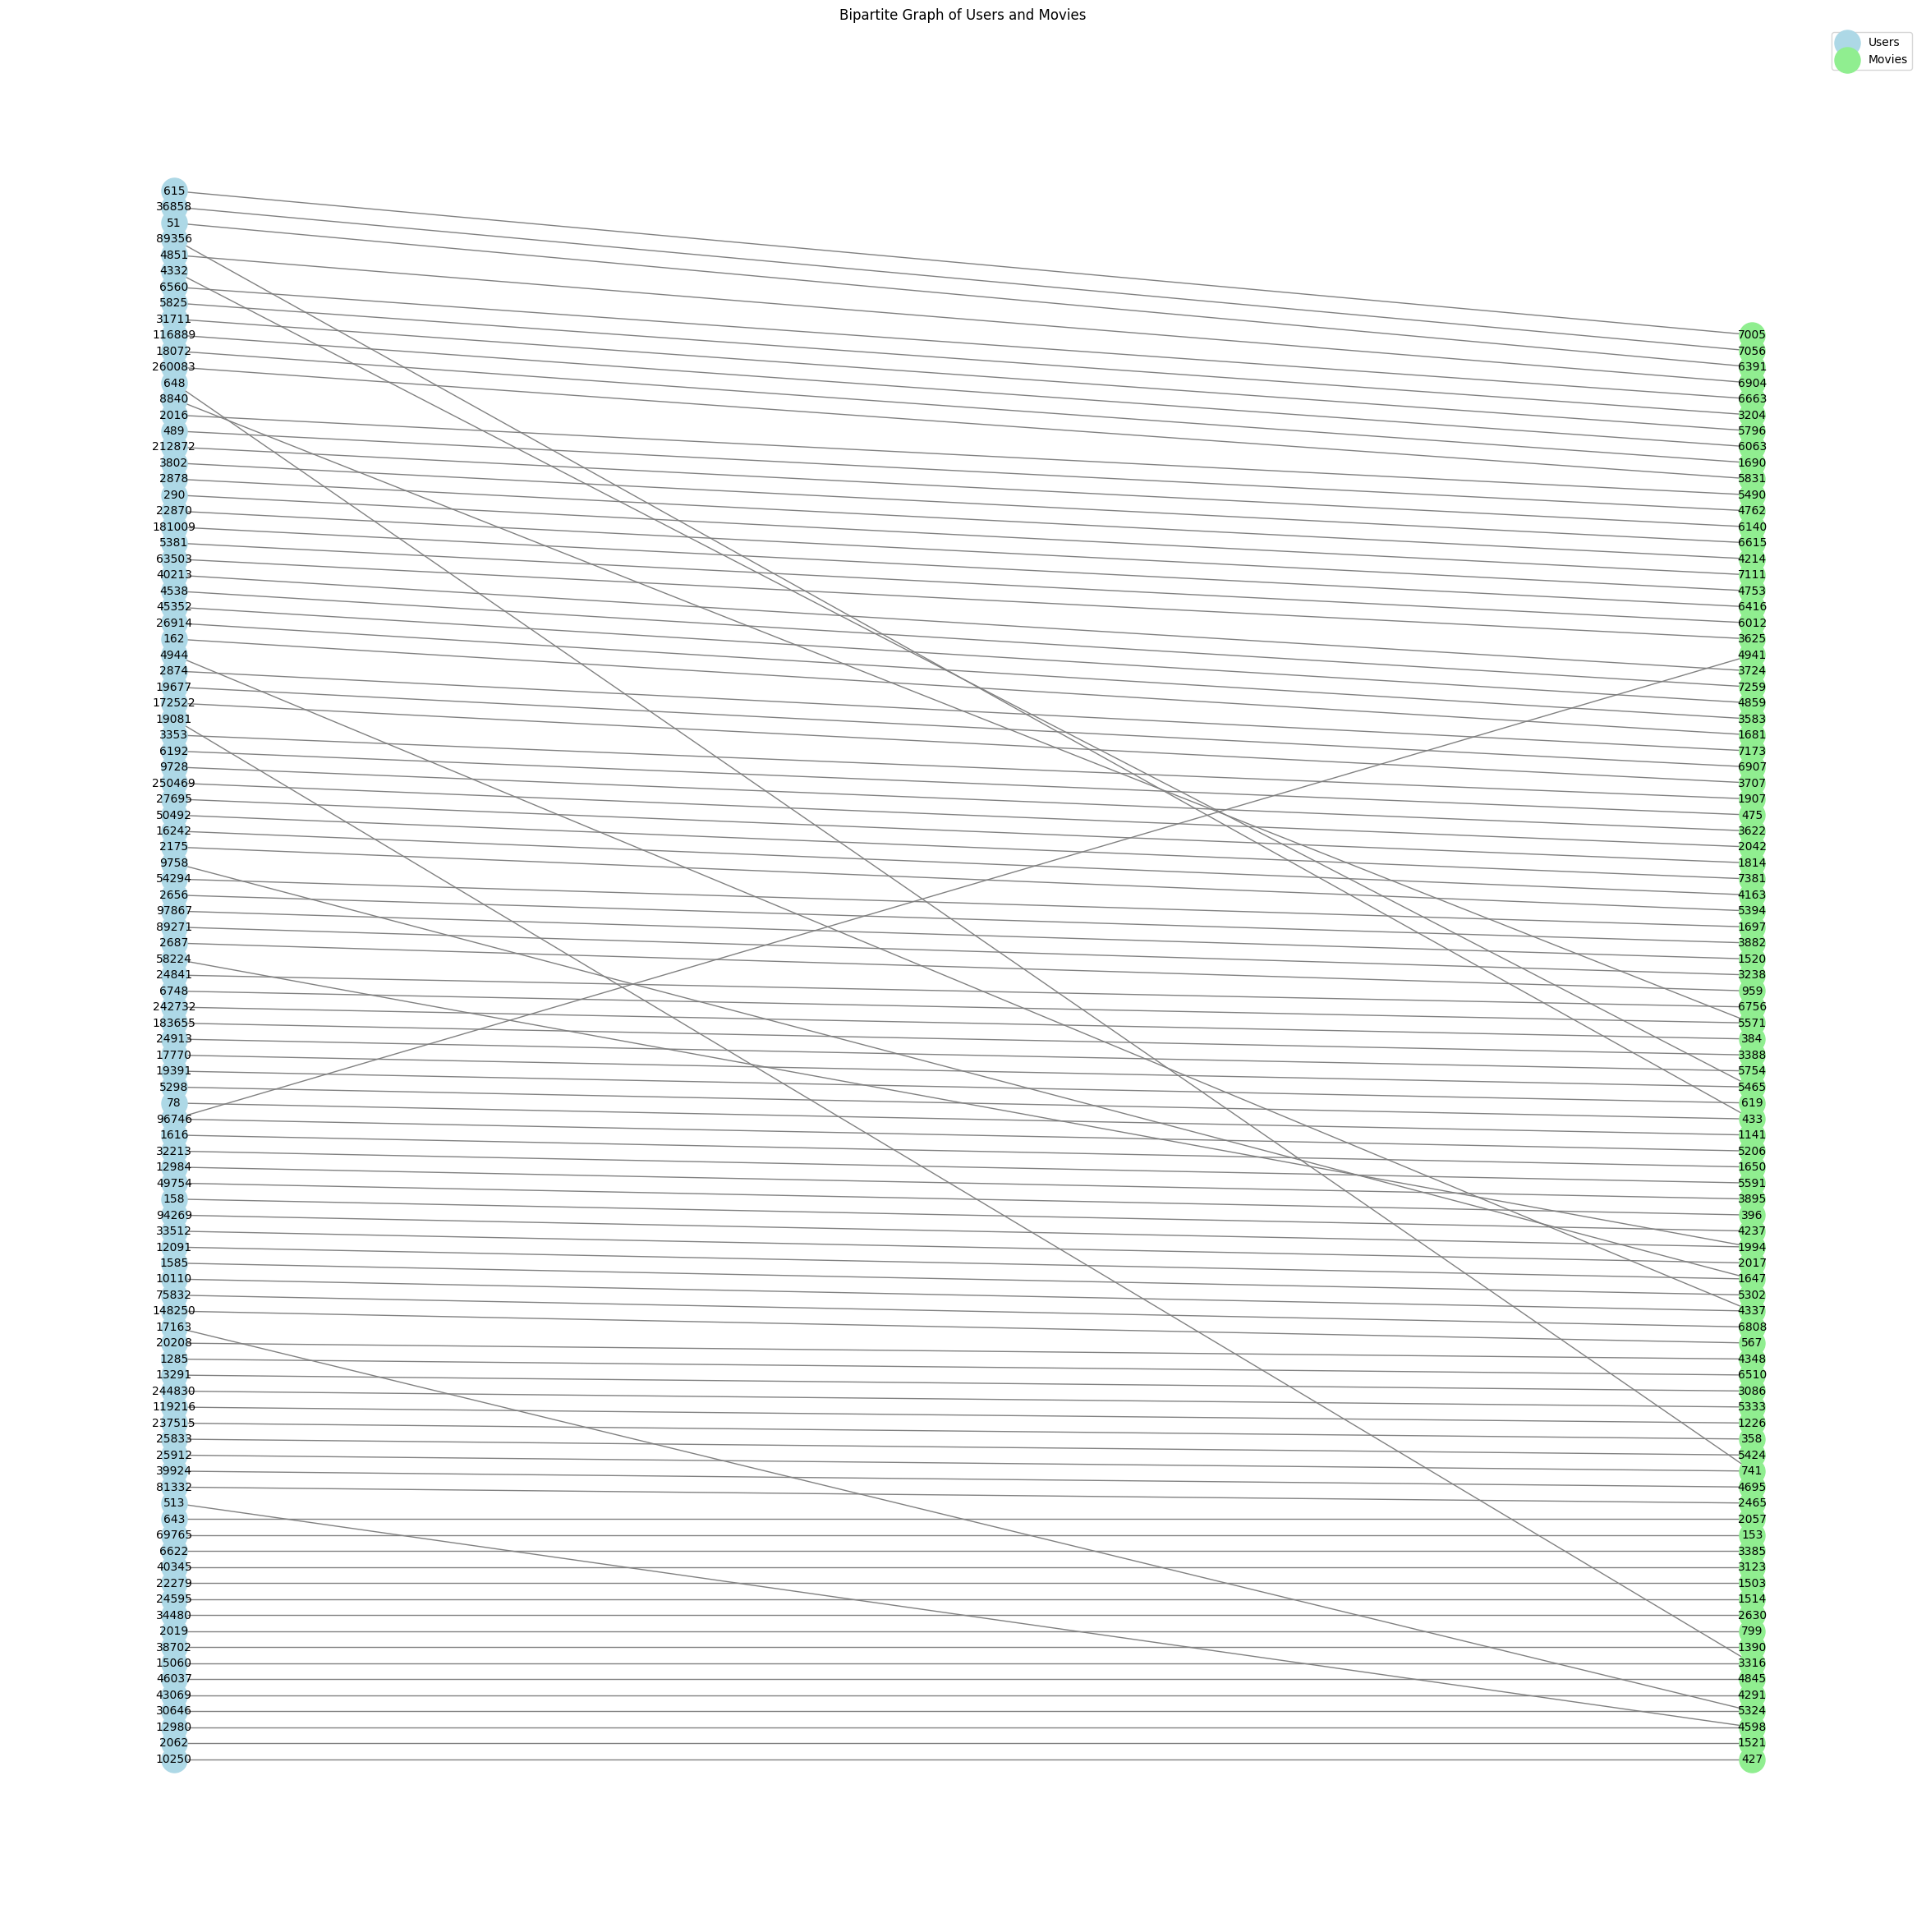

In [408]:
train_df_to_visualise = train_df.head(100)
graph_recommender = GraphRecommender()
graph_recommender.fit(train_df_to_visualise)

plt.figure(figsize=(30, 30))
user_nodes = list(train_df_to_visualise['user_id'].unique())
movie_nodes = list(train_df_to_visualise['movie_id'].unique())

pos = {user: (0, i) for i, user in enumerate(user_nodes)}
pos.update({movie: (1, i) for i, movie in enumerate(movie_nodes)})

nx.draw_networkx_nodes(graph_recommender.graph, pos, nodelist=user_nodes, node_color='lightblue', node_size=500, label="Users")
nx.draw_networkx_nodes(graph_recommender.graph, pos, nodelist=movie_nodes, node_color='lightgreen', node_size=500, label="Movies")
nx.draw_networkx_edges(graph_recommender.graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph_recommender.graph, pos, font_size=10, font_color='black')

plt.legend()
plt.title("Bipartite Graph of Users and Movies")
plt.axis('off')
plt.show()


In [410]:
graph_recommender = GraphRecommender()
graph_recommender.fit(train_df_small)
test_df_small["graph_neighbors_recs"] = graph_recommender.predict(test_df_small, topn=10)
evaluate_recommender(df=test_df_small, model_preds_col="graph_neighbors_recs")

Training...


Adding edges:   0%|          | 0/86118 [00:00<?, ?it/s]

Predicting...


Generating recommendations:   0%|          | 0/978 [00:00<?, ?it/s]

{'ndcg': 0.004980542170029264, 'recall': 0.00044213522094688375}

### Implementing the solution of [one of the students from CS224W course](https://medium.com/stanford-cs224w/recommender-systems-with-gnns-in-pyg-d8301178e377)

I realized that aggregating movies from one-level neighbors wasn't effective, so I decided to explore more complex approaches.

I watched an interesting [lecture](https://www.youtube.com/watch?v=OV2VUApLUio) on recommender systems and discovered a website with [tutorials](https://medium.com/stanford-cs224w) created by students who officially took the CS224W course. While browsing that site, I found a relevant page dedicated to movie recommendations.


Done in separate notebook

## Multi-armed bandits

Multi-armed bandit (MAB) algorithms are an effective approach for recommendation systems, particularly in addressing the cold start problem, which occurs when there is insufficient data about users or items to make accurate recommendations. Here are some key reasons why MAB algorithms are beneficial:

- Their capability to navigate the trade-off between **exploring** new recommendations and utilizing existing (**exploitation**) user preferences, allowing for the discovery of interests even with limited information.
- The ability to **rapidly adapt** to evolving user preferences, which helps maintain the relevance of recommendations over time.
- **Efficiency in learning** user preferences with minimal interaction, making them ideal for scenarios with sparse data, such as new users or items.
- A strong approach to **cold start** situations by initially providing varied recommendations, leading to personalized suggestions as user interactions accumulate.

I chose this approach because many users have watched few movies, which provides too little data to accurately define their preferences and we should deal with cold-start problem. I became familiar with multi-armed bandit algorithms through three interesting and undestandable videos:
- [Video 1](https://www.youtube.com/watch?v=e3L4VocZnnQ&t=0s)
- [Video 2](https://www.youtube.com/watch?v=FgmMK6RPU1c)
- [Video 3](https://www.youtube.com/watch?v=e3L4VocZnnQ)

### Epsilon Greedy Recommender


#### Overview
The epsilon-greedy algorithm is a simple and popular strategy used in  multi-armed bandit problems. It is designed to balance the exploration of new options with the exploitation of known rewarding options.

#### Key Concepts

- **Exploration vs. Exploitation**:
  - **Exploration** refers to trying out new actions to discover their potential rewards.
  - **Exploitation** involves choosing the action that has the highest known reward based on past experience.

- **Epsilon (ε)**:
  - Epsilon is a small positive value (0 < ε < 1) that determines the probability of exploration.
  - When a random number is less than ε, the algorithm explores a random action; otherwise, it exploits the best-known action.

#### Advantages
- Simple to implement and understand.
- Provides a straightforward way to balance exploration and exploitation.

#### Disadvantages
- The performance can be sensitive to the choice of epsilon.
- Can lead to suboptimal performance if not tuned properly, as it may either explore too much or exploit too little.


In [ ]:
class EpsilonGreedyRecommender(BaseRecommender):
    """
    Epsilon-Greedy Recommender System Class
    This class implements an Epsilon-Greedy strategy for recommendation, balancing exploration
    of new items with exploitation of known rewards.
    """

    def __init__(self, epsilon: float = 0.05) -> None:
        """
        Initialize the EpsilonGreedy recommender.

        Parameters:
            epsilon (float): The probability of exploring new items (default is 0.05).
        """
        super().__init__()
        self.epsilon = epsilon  # Exploration probability
        self.item_counts = {}  # Counts of how many times each item has been selected
        self.item_rewards = {}  # Total rewards received for each item
        self.avg_rewards = []  # List of items sorted by average rewards
        self.trained = False  # Flag indicating if the model has been trained
        np.random.seed(42)  # Set seed for reproducibility

    def fit(self, train_df: pd.DataFrame, item_id_col: str = "movie_id") -> None:
        """
        Fit the model to the training data.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
        """
        unique_items = set()  # Store unique items from the training data
        for item_list in train_df[item_id_col]:
            if isinstance(item_list, list):
                unique_items.update(item_list)  # Update set with items from list
            else:
                unique_items.add(item_list)  # Add single item to the set

        for item in unique_items:
            self.item_counts[item] = 0  # Initialize item counts
            self.item_rewards[item] = 0.0  # Initialize item rewards
            self.insert_sorted(item, 0.0)  # Insert item into the sorted average rewards list
        self.train_predict(train_df)  # Train the model with the training data

    def train_predict(self, train_df: pd.DataFrame, item_id_col: str = "movie_id", topn: int = 10) -> None:
        """
        Train the model by predicting and updating rewards based on interactions.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
            topn (int): The number of items to recommend (default is 10).
        """
        for i in tqdm(range(len(train_df)), desc="Training", unit="iteration"):
            recommended_items = self.predict_n(topn=topn)  # Get recommended items
            reward_pos = 1  # Positive reward for correctly recommended items
            reward_neg = 0  # Negative reward for incorrectly recommended items
            for item in recommended_items:
                if item in train_df[item_id_col].iloc[i]:  # Check if the recommended item was interacted with
                    self.update(item, reward_pos)  # Update for positive reward
                else:
                    self.update(item, reward_neg)  # Update for negative reward
        self.trained = True  # Mark the model as trained

    def predict(self, df: pd.DataFrame, item_id_col: str = "movie_id", topn: int = 10) -> List[np.ndarray]:
        """
        Predict recommendations for users in the provided DataFrame.

        Parameters:
            df (pd.DataFrame): The DataFrame for which to make predictions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
            topn (int): The number of items to recommend (default is 10).

        Returns:
            List[np.ndarray]: A list of arrays containing recommended item IDs for each user.
        """
        assert self.trained  # Ensure the model has been trained
        all_recs = []  # List to store recommendations for all users
        for i in tqdm(range(len(df)), desc="Predicting", unit="user"):
            recommended_items = self.predict_n(topn=topn)  # Get recommended items
            reward_pos = 1  # Positive reward for correctly recommended items
            reward_neg = 0  # Negative reward for incorrectly recommended items
            for item in recommended_items:
                if item in df[item_id_col].iloc[i]:  # Check if the recommended item was interacted with
                    self.update(item, reward_pos)  # Update for positive reward
                else:
                    self.update(item, reward_neg)  # Update for negative reward
            all_recs.append(np.array(recommended_items))  # Append recommendations for the user
        return all_recs  # Return all recommendations

    def predict_n(self, topn: int = 10) -> List[int]:
        """
        Generate a list of recommended items based on the epsilon-greedy strategy.

        Parameters:
            topn (int): The number of items to recommend (default is 10).

        Returns:
            List[int]: A list of recommended item IDs.
        """
        if np.random.random() < self.epsilon:  # Decide whether to explore or exploit
            recommended_items = np.random.choice(list(self.item_counts.keys()), size=topn, replace=False)  # Explore
        else:
            recommended_items = [item for item, _ in self.avg_rewards[:topn]]  # Exploit
        return recommended_items  # Return the recommended items

    def update(self, selected_item: int, reward: float) -> None:
        """
        Update the counts and rewards for the selected item and reinsert it in the sorted list.

        Parameters:
            selected_item (int): The ID of the selected item.
            reward (float): The reward received for the selected item.
        """
        if selected_item in self.item_counts:
            self.item_counts[selected_item] += 1  # Increment count for selected item
            self.item_rewards[selected_item] += reward  # Update total rewards
            new_avg_reward = self.item_rewards[selected_item] / self.item_counts[selected_item]  # Calculate new average reward
            self.remove_from_sorted(selected_item)  # Remove the item from sorted list
            self.insert_sorted(selected_item, new_avg_reward)  # Reinsert with updated average reward
        else:
            self.item_counts[selected_item] = 1  # Initialize count for new item
            self.item_rewards[selected_item] = reward  # Set initial reward
            new_avg_reward = self.item_rewards[selected_item] / self.item_counts[selected_item]  # Calculate average reward
            self.insert_sorted(selected_item, new_avg_reward)  # Insert the new item in the sorted list

    def insert_sorted(self, item: int, avg_reward: float) -> None:
        """
        Insert an item into the sorted list of average rewards in descending order.

        Parameters:
            item (int): The ID of the item to insert.
            avg_reward (float): The average reward of the item.
        """
        if not self.avg_rewards:
            self.avg_rewards.append((item, avg_reward))  # Append if list is empty
        else:
            inserted = False
            for idx, (_, reward) in enumerate(self.avg_rewards):
                if avg_reward > reward:  # Find the correct position to insert
                    self.avg_rewards.insert(idx, (item, avg_reward))  # Insert item
                    inserted = True
                    break
            if not inserted:
                self.avg_rewards.append((item, avg_reward))  # Append if it's the smallest reward

    def remove_from_sorted(self, item: int) -> None:
        """
        Remove an item from the sorted list of average rewards.

        Parameters:
            item (int): The ID of the item to remove.
        """
        self.avg_rewards = [(i, r) for i, r in self.avg_rewards if i != item]  # Filter out the item



In [ ]:
epsilon_greedy = EpsilonGreedyRecommender(epsilon=0.05)
epsilon_greedy.fit(train_df_agg)
test_df["epsilon_greedy_recs"] = epsilon_greedy.predict(test_df)
print(evaluate_recommender(test_df, model_preds_col="epsilon_greedy_recs"))

Predicting: 100%|██████████| 66900/66900 [08:08<00:00, 136.99user/s]


{'ndcg': 0.14461265763278278, 'recall': 0.07582311140308581}


### UCB1 Recommender

#### Overview
The Upper Confidence Bound (UCB) algorithm is a popular strategy in multi-armed bandit problems that focuses on maximizing the cumulative reward over time. It balances exploration and exploitation by selecting actions based on their potential rewards and the uncertainty associated with those rewards.

#### Key Concepts

- **Upper Confidence Bound (UCB)**:
  - UCB is a method that estimates the potential reward of each action while incorporating the uncertainty of the estimates. It favors actions with higher uncertainty and previously lower exploration counts, thus encouraging exploration of less-tried options.

- **Action Selection**:
 - Each action $i$ is selected based on the formula:
$UCB\_i = \bar{X}\_i + sqrt(2 * ln(n) / n\_i)$

    where:
    - $\bar{X}_i$ is the average reward of action $i$.
    - $n$ is the total number of actions taken.
    - $n_i$ is the number of times action $i$ has been selected.
  
#### Advantages
- Mathematically grounded approach to balancing exploration and exploitation.
- Performs well in the long run as more data is collected compared to epsilon greedy method.
- Reduces the risk of suboptimal selections.

#### Disadvantages
- Computationally intensive, because recalculating bounds for many actions can slow down decision-making.
- Struggles with actions that have inconsistent rewards.
- Maintaining statistics for many actions can become impractical.


In [ ]:
class UCB1Recommender(BaseRecommender):
    """
    Upper Confidence Bound (UCB1) Recommender System Class
    This class implements the UCB1 strategy for recommendation, balancing exploration
    of new items with exploitation of known rewards.
    """

    def __init__(self) -> None:
        """
        Initialize the UCB1 recommender.
        """
        super().__init__()  # Call the parent class constructor
        self.item_counts = {}  # Counts of how many times each item has been selected
        self.item_rewards = {}  # Total rewards received for each item
        self.total_counts = 0  # Total number of selections made
        np.random.seed(42)  # Set seed for reproducibility
        self.trained = False  # Flag indicating if the model has been trained

    def fit(self, train_df: pd.DataFrame, item_id_col: str = "movie_id") -> None:
        """
        Fit the model to the training data.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
        """
        unique_items = train_df[item_id_col].unique()  # Get unique items from the training data
        for item in unique_items:
            if item not in self.item_counts:
                self.item_counts[item] = 0  # Initialize count for new item
                self.item_rewards[item] = 0.0  # Initialize reward for new item
        self.train_predict(train_df, item_id_col)  # Train the model with the training data

    def train_predict(self, train_df: pd.DataFrame, item_id_col: str = "movie_id", topn: int = 10) -> None:
        """
        Train the model by predicting and updating rewards based on interactions.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
            topn (int): The number of items to recommend (default is 10).
        """
        for i in tqdm(range(len(train_df)), desc="Training", unit="iteration"):
            recommended_items = self.predict_n(topn=topn)  # Get recommended items
            user_movie = train_df.iloc[i][item_id_col]  # Get the movie for the current user
            if user_movie in recommended_items:
                self.update(user_movie, 1)  # Positive reward if the recommended item was interacted with
            else:
                for item in recommended_items:
                    self.update(item, 0)  # Negative reward for items not interacted with
        self.trained = True  # Mark the model as trained

    def predict(self, df: pd.DataFrame, item_id_col: str = "movie_id", topn: int = 10) -> List[np.ndarray]:
        """
        Predict recommendations for users in the provided DataFrame.

        Parameters:
            df (pd.DataFrame): The DataFrame for which to make predictions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
            topn (int): The number of items to recommend (default is 10).

        Returns:
            List[np.ndarray]: A list of arrays containing recommended item IDs for each user.
        """
        assert self.trained  # Ensure the model has been trained
        all_recs = []  # List to store recommendations for all users
        for i in tqdm(range(len(df)), desc="Predicting", unit="user"):
            recommended_items = self.predict_n(topn=topn)  # Get recommended items
            reward_pos = 1  # Positive reward for correctly recommended items
            reward_neg = 0  # Negative reward for incorrectly recommended items
            for item in recommended_items:
                if item in df.iloc[i][item_id_col]:  # Check if the recommended item was interacted with
                    self.update(item, reward_pos)  # Update for positive reward
                else:
                    self.update(item, reward_neg)  # Update for negative reward
            all_recs.append(np.array(recommended_items))  # Append recommendations for the user
        return all_recs  # Return all recommendations

    def predict_n(self, topn: int = 10) -> List[int]:
        """
        Generate a list of recommended items based on the UCB1 strategy.

        Parameters:
            topn (int): The number of items to recommend (default is 10).

        Returns:
            List[int]: A list of recommended item IDs.
        """
        ucb_scores = []  # List to store UCB scores for each item
        for item in self.item_counts.keys():
            if self.item_counts[item] == 0:
                ucb = float('inf')  # Assign infinite UCB score for unselected items
            else:
                avg_reward = self.item_rewards[item] / self.item_counts[item]  # Calculate average reward
                exploration_term = np.sqrt((2 * np.log(self.total_counts)) / self.item_counts[item])  # Exploration term
                ucb = avg_reward + exploration_term  # Calculate UCB score
            ucb_scores.append((item, ucb))  # Append item and its UCB score to the list

        recommended_items = sorted(ucb_scores, key=lambda x: x[1], reverse=True)[:topn]  # Sort and get top-n items
        return [item for item, _ in recommended_items]  # Return the item IDs of recommended items

    def update(self, selected_item: int, reward: float) -> None:
        """
        Update counts and rewards for a selected item.

        Parameters:
            selected_item (int): The ID of the selected item.
            reward (float): The reward received for the selected item.
        """
        self.item_counts[selected_item] += 1  # Increment count for selected item
        self.item_rewards[selected_item] += reward  # Update total rewards
        self.total_counts += 1  # Increment total counts

In [ ]:
ucb = UCB1Recommender()
ucb.fit(train_df)
test_df["ucb_recs"] = ucb.predict(test_df)
print(evaluate_recommender(test_df, model_preds_col="ucb_recs"))

Predicting: 100%|██████████| 66900/66900 [13:23<00:00, 83.25user/s]


{'ndcg': 0.04164228254066232, 'recall': 0.011357747044958054}


### Thompson Sampling Recommender

#### Overview
Thompson Sampling is a Bayesian approach to solving multi-armed bandit problems, balancing exploration and exploitation by selecting actions based on the probability of them being the optimal choice.

#### Key Concepts

- **Bayesian Inference**:
  - Thompson Sampling uses prior distributions to model the uncertainty of each action’s reward. The prior for each action $i$ is often modeled as a Beta distribution:
  $\text{Beta}(\alpha_i, \beta_i)$
  where $\alpha_i$ and $\beta_i$ are parameters that represent the number of successes and failures for action $i$, respectively.

- **Action Selection**:
  - Each action $i$ is selected by sampling from its posterior distribution:
  $\theta_i \sim \text{Beta}(\alpha_i, \beta_i)$

  The action with the highest sampled reward is chosen:
  $a_t = \arg\max_i \theta_i$

- **Updating Parameters**:
  - After observing a reward $r_t$ for the selected action $a_t$:
  - If $r_t = 1$ (success), update:
  $\alpha_{a_t} \leftarrow \alpha_{a_t} + 1$

  - If $r_t = 0$ (failure), update:
  $\beta_{a_t} \leftarrow \beta_{a_t} + 1$

#### Advantages
- Adapts to changing environments by updating beliefs based on new data.
- Generally outperforms simpler strategies.

#### Disadvantages
- May perform poorly in environments with highly variable rewards.
- Computationally intensive d.
- Less effective with a large number of action s.

In [ ]:
class ThompsonSamplingRecommender(BaseRecommender):
    """
    Thompson Sampling Recommender System Class
    This class implements the Thompson Sampling strategy for recommendation,
    which balances exploration and exploitation based on Bayesian inference.
    """

    def __init__(self) -> None:
        """
        Initialize the Thompson Sampling recommender.
        """
        super().__init__()  # Initialize the base recommender class
        self.item_counts = {}  # Counts of how many times each item has been selected
        self.item_rewards = {}  # Total rewards received for each item
        self.trained = False  # Flag indicating if the model has been trained
        np.random.seed(42)  # Set seed for reproducibility

    def fit(self, train_df: pd.DataFrame, item_id_col: str = "movie_id") -> None:
        """
        Fit the model to the training data.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
        """
        unique_items = set()  # Store unique items from the training data
        for item_list in train_df[item_id_col]:
            if isinstance(item_list, list):
                unique_items.update(item_list)  # Update set with items from list
            else:
                unique_items.add(item_list)  # Add single item to the set

        # Initialize counts and rewards for each item
        for item in unique_items:
            self.item_counts[item] = 0  # Initialize item counts
            self.item_rewards[item] = 0.0  # Initialize item rewards

        self.train_predict(train_df)  # Train the model with the training data

    def train_predict(self, train_df: pd.DataFrame, item_id_col: str = "movie_id", topn: int = 10) -> None:
        """
        Train the model by predicting and updating rewards based on interactions.

        Parameters:
            train_df (pd.DataFrame): The training DataFrame containing user interactions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
            topn (int): The number of items to recommend (default is 10).
        """
        for i in range(len(train_df)):  # Iterate through each interaction in the training data
            recommended_items = self.predict_n(topn=topn)  # Get recommended items
            reward_pos = 1  # Positive reward for correctly recommended items
            reward_neg = 0  # Negative reward for incorrectly recommended items
            for item in recommended_items:
                if item in train_df[item_id_col].iloc[i]:  # Check if the recommended item was interacted with
                    self.update(item, reward_pos)  # Update for positive reward
                else:
                    self.update(item, reward_neg)  # Update for negative reward
        self.trained = True  # Mark the model as trained

    def predict(self, df: pd.DataFrame, item_id_col: str = "movie_id", topn: int = 10) -> List[np.ndarray]:
        """
        Predict recommendations for users in the provided DataFrame.

        Parameters:
            df (pd.DataFrame): The DataFrame for which to make predictions.
            item_id_col (str): The column name for item IDs (default is "movie_id").
            topn (int): The number of items to recommend (default is 10).

        Returns:
            List[np.ndarray]: A list of arrays containing recommended item IDs for each user.
        """
        assert self.trained  # Ensure the model has been trained
        all_recs = []  # List to store recommendations for all users
        for i in range(len(df)):  # Iterate through each user in the prediction DataFrame
            recommended_items = self.predict_n(topn=topn)  # Get recommended items
            reward_pos = 1  # Positive reward for correctly recommended items
            reward_neg = 0  # Negative reward for incorrectly recommended items
            for item in recommended_items:
                if item in df[item_id_col].iloc[i]:  # Check if the recommended item was interacted with
                    self.update(item, reward_pos)  # Update for positive reward
                else:
                    self.update(item, reward_neg)  # Update for negative reward
            all_recs.append(np.array(recommended_items))  # Append recommendations for the user
        return all_recs  # Return all recommendations

    def predict_n(self, topn: int = 10) -> List[int]:
        """
        Generate a list of recommended items based on the Thompson Sampling strategy.

        Parameters:
            topn (int): The number of items to recommend (default is 10).

        Returns:
            List[int]: A list of recommended item IDs.
        """
        sampled_rewards = []  # List to store sampled rewards for each item
        for item in self.item_counts.keys():
            alpha = self.item_rewards[item]  # Positive reward count (successes)
            beta = self.item_counts[item] - self.item_rewards[item] + 1  # Negative reward count (failures)
            sample = np.random.beta(alpha, beta)  # Sample from Beta distribution
            sampled_rewards.append((item, sample))  # Store the item and its sampled reward

        # Sort items by their sampled rewards and recommend the top-n items
        recommended_items = sorted(sampled_rewards, key=lambda x: x[1], reverse=True)[:topn]
        return [item for item, _ in recommended_items]  # Return the recommended item IDs

    def update(self, selected_item: int, reward: float) -> None:
        """
        Update the counts and rewards for the selected item.

        Parameters:
            selected_item (int): The ID of the selected item.
            reward (float): The reward received for the selected item.
        """
        self.item_counts[selected_item] += 1  # Increment count for selected item
        self.item_rewards[selected_item] += reward  # Update total rewards

In [ ]:
thompson_sampling_recommender = ThompsonSamplingRecommender()
thompson_sampling_recommender.fit(train_df)
test_df["thompson_recs"] = thompson_sampling_recommender.predict(test_df)
print(evaluate_recommender(test_df, model_preds_col="thompson_recs"))

Predicting: 100%|██████████| 66900/66900 [07:05<00:00, 157.29user/s]


{'ndcg': 0.1732581012147785, 'recall': 0.08586052808410832}


# 5. Comparison and conclusion

Note: for training and testing of Content-Based and Graph-based recommenders small version of dataset (user_id < 1000) was used

In evaluating the performance of different recommender systems, we analyzed the NDCG (Normalized Discounted Cumulative Gain) and recall metrics. The results indicate that while Content-Based and Graph-based recommenders show limited effectiveness, the multi-armed bandit approaches demonstrate significantly better performance.

### Performance Metrics

| Recommender                  | NDCG               | Recall               |
|------------------------------|--------------------|----------------------|
| ContentBasedRecommender      | 0.0192             | 0.0019               |
| GraphRecommender             | 0.0050             | 0.0004               |
| EpsilonGreedyRecommender     | 0.1446             | 0.0758               |
| UCB1Recommender              | 0.0416             | 0.0114               |
| ThompsonSamplingRecommender   | 0.1733             | 0.0859               |

### Analysis

- **Content-Based Recommender**: The NDCG and recall values are quite low, suggesting that this method struggles to recommend relevant items effectively.
  
- **Graph Recommender**: Similar to the Content-Based approach, the Graph Recommender also demonstrates weak performance, with both metrics significantly lower than those of the bandit methods.

- **Epsilon Greedy Recommender**: This approach shows a notable improvement, particularly in recall, indicating that it is better at identifying relevant items for users compared to the previous methods.

- **UCB1 Recommender**: While UCB1 shows an improvement over the content-based and graph recommenders, it still falls short of the performance exhibited by the epsilon-greedy and Thompson Sampling approaches.

- **Thompson Sampling Recommender**: This method outperforms all others across both metrics, indicating it is the most effective at making relevant recommendations while also maximizing user engagement.

### Conclusion

The analysis clearly indicates that the multi-armed bandit algorithms, especially the Thompson Sampling method, significantly outperform both content-based and graph-based recommenders in terms of NDCG and recall. This suggests that adaptive recommendation strategies are more suited for scenarios with limited user interactions, thereby enhancing user satisfaction and engagement in the recommendation process.
